In [ ]:
k_opt_comp, k_opt_acel, lambda_opt_comp, lambda_opt_acel = optimosFB(paso_prueba,INTERVALO_T, y0, v0)

In [ ]:
print(k_opt_comp)
print(k_opt_acel)
print(lambda_opt_comp)
print(lambda_opt_acel)

67000
1000
5100
150


In [ ]:
def calculo_q_c_dinamico2(u,v,paso,nuevo_k,nuevo_lambda,punto_tiempo):
    """
    Calculamos las q's
    """
    c, c_prima = valor_de_c(punto_tiempo)
    q1u = paso*v
    q1v = paso*((1/m)*(nuevo_k*(c-u)+nuevo_lambda*(c_prima-v)))

    q2u = paso*(v+q1v)
    q2v = paso*((1/m)*(nuevo_k*(c-(u+q1u))+nuevo_lambda*(c_prima-(v+q1v))))

    return q1u,q2u,q1v,q2v

In [ ]:
def runge_kutta_dinamico(funcion, u0, v0, nuevo_k, nuevo_lambd, paso_h, intervalo_t):
    # Creamos vector tiempo desde 0 hasta intervalo_t, con un paso_h.
    # Aca guardamos los puntos en el tiempo donde vamos a evaluar la solución.
    tiempo = np.arange(0, intervalo_t, paso_h)


    valores_u = []
    valores_v = []

    # seteamos condiciones iniciales
    u = u0
    v = v0

    # Recorremos los puntos en el tiempo.
    for t in tiempo:
        # Guardo el valor obtenido para el paso actual en los vectores.
        valores_u.append(u)
        valores_v.append(v)

        q1u,q2u,q1v,q2v = calculo_q_c_dinamico2(u,v,paso_h, nuevo_k, nuevo_lambda, t)

        u += 0.5*(q1u+q2u)
        v += 0.5*(q1v+q2v)

    return tiempo, valores_u, valores_v

In [ ]:
nuevo_k = 67000

In [ ]:
nuevo_lambda = 5100

In [ ]:
tiempo, valores_y, _ = runge_kutta_dinamico(calculo_q, y0, v0, nuevo_k, nuevo_lambda, paso_h, INTERVALO_T)


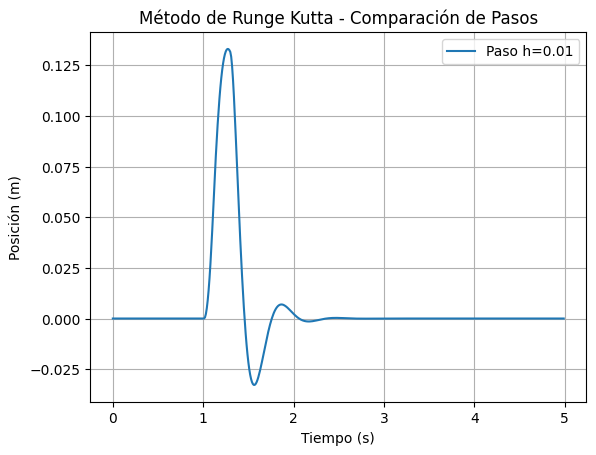

In [ ]:
plt.plot(tiempo, valores_y, label=f"Paso h={paso_h}")
plt.title("Método de Runge Kutta - Comparación de Pasos")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.legend()
plt.grid(True)
plt.show()

# Imports Iniciales


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Funcionalidades globales

Condiciones iniciales:

In [ ]:
y0 = 0  # Condición inicial para y
v0 = 0  # Condición inicial para v

## Ejercicio 1

Definición de variables a usar para los 3 métodos:

In [ ]:
PADRON = 99444
# Variables a usar:
m = PADRON / 200  # kg
k = 25000  # N/m
lambda_ = 0  # Ns/m
c = 0.1  # m
c_prima = 0 # estoy asumiendo c' como 0
paso_h = 0.005  # segundos
pasos_h = [0.05, 0.025, 0.01, 0.005, 0.0025, 0.001, 0.0005, 0.0002]  # Lista de diferentes tamaños de paso en segundos
INTERVALO_T = 5  # segundos

## Ejercicio 2

## Analisis de error

Esta sección depende de tener cargados todos los métodos de runge_kutta ya que se toma ese método con un tamaño de paso muy chico como una solución verdadera.

In [ ]:
paso_minimo = 0.000001

In [ ]:
def calcular_error(solucion_analitica, solucion_numerica):
    return np.abs(solucion_analitica - solucion_numerica)

In [ ]:
def calculo_q_parametrizado(u,v,paso, c, c_prima, k, lambda_):
    """
    Calculamos las q's
    """
    q1u = paso*v
    q1v = paso*((1/m)*(k*(c-u)+lambda_*(c_prima-v)))

    q2u = paso*(v+q1v)
    q2v = paso*((1/m)*(k*(c-(u+q1u))+lambda_*(c_prima-(v+q1v))))

    return q1u,q2u,q1v,q2v

def runge_kutta_parametrizado(u0, v0, paso_h, intervalo_t, c, c_prima, k, lambda_):
    # Creamos vector tiempo desde 0 hasta intervalo_t, con un paso_h.
    # Aca guardamos los puntos en el tiempo donde vamos a evaluar la solución.
    tiempo = np.arange(0, intervalo_t, paso_h)


    valores_u = []
    valores_v = []

    # seteamos condiciones iniciales
    u = u0
    v = v0

    # Recorremos los puntos en el tiempo.
    for t in tiempo:
        # Guardo el valor obtenido para el paso actual en los vectores.
        valores_u.append(u)
        valores_v.append(v)

        q1u,q2u,q1v,q2v = calculo_q_parametrizado(u,v,paso_h, c, c_prima, k, lambda_)

        u += 0.5*(q1u+q2u)
        v += 0.5*(q1v+q2v)

    return tiempo, valores_u, valores_v


In [ ]:
tiempo_analitico, valores_y_analitico, velocidad_analitica = runge_kutta_parametrizado(y0, v0, paso_minimo, INTERVALO_T, c, c_prima, k, lambda_)


### Solución analítica

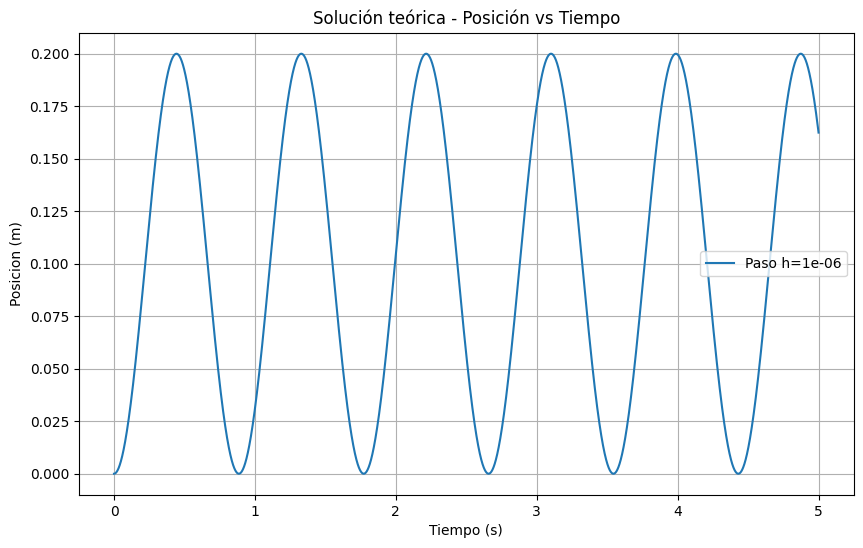

In [ ]:

# Gráfico comparativo
plt.figure(figsize=(10, 6))
plt.plot(tiempo_analitico, valores_y_analitico, label=f"Paso h={paso_minimo}")

plt.title("Solución teórica - Posición vs Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posicion (m)")
plt.legend()
plt.grid(True)
plt.show()

Función de utilidad para poder comparar arrays de puntos de diferentes tamaños:

In [ ]:
def emparejar_tiempos_valores(tiempo_valor_y_numerica, tiempo_valor_y_analitica):
    tiempos_numerica = tiempo_valor_y_numerica[0]
    valores_numerica = tiempo_valor_y_numerica[1]

    tiempos_analitica = tiempo_valor_y_analitica[0]
    valores_analitica = tiempo_valor_y_analitica[1]

    # Inicializar arrays para almacenar los tiempos y valores emparejados
    tiempos_emparejados = []
    valores_emparejados = []

    # Para cada punto de tiempo en la solucion numerica, encuentra el índice correspondiente en la solucion analitica
    for tiempo_numerica, valor_numerica in zip(tiempos_numerica, valores_numerica):
        idx_analitica = np.searchsorted(tiempos_analitica, tiempo_numerica)

        # Chequeo los límites del array
        if idx_analitica == 0:
            tiempo_cercano = tiempos_analitica[idx_analitica]
            valor_cercano = valores_analitica[idx_analitica]

            # Almacena los tiempos y valores emparejados
            tiempos_emparejados.append(tiempo_cercano)
            valores_emparejados.append(valor_cercano)

        elif 0 < idx_analitica < len(tiempos_analitica):
            tiempo_analitica_izquierda = tiempos_analitica[idx_analitica - 1]
            tiempo_analitica_derecha = tiempos_analitica[idx_analitica]

            # Encuentra el punto en el tiempo analitico más cercano a el punto actual iterado de la solución numerica
            # (restando cual esta mas cerca)
            if abs(tiempo_numerica - tiempo_analitica_izquierda) < abs(tiempo_numerica - tiempo_analitica_derecha):
                tiempo_cercano = tiempo_analitica_izquierda
                valor_cercano = valores_analitica[idx_analitica - 1]
            else:
                tiempo_cercano = tiempo_analitica_derecha
                valor_cercano = valores_analitica[idx_analitica]

            # Almacena los tiempos y valores emparejados
            tiempos_emparejados.append(tiempo_cercano)
            valores_emparejados.append(valor_cercano)

    return np.array(tiempos_emparejados), np.array(valores_emparejados)




# Resolucion

## Ejercicio 1: Oscilador armónico con excitación uniforme


### 1.1. Resolver el sistema de ecuaciones utilizando los métodos de Euler, Euler implícito y Runge Kutta de orden 2 por un período de 5 segundos, introduciendo los siguientes datos:

#### Euler Explicito

In [ ]:
# Aplico cambio de variable:
def sistema_cambio_de_variable(u, v):
    u_prima = v
    v_prima = (k / m) * (c - u) + (lambda_ / m) * (c_prima- v)
    return u_prima, v_prima

# Euler explicito
def euler_explicito(funcion, u0, v0, paso_h, intervalo_t):
    # Creamos vector tiempo desde 0 hasta intervalo_t, con un paso_h.
    # Aca guardamos los puntos en el tiempo donde vamos a evaluar la solución.
    tiempo = np.arange(0, intervalo_t, paso_h)

    valores_u = []
    valores_v = []

    # seteamos condiciones iniciales
    u = u0
    v = v0

    # Recorremos los puntos en el tiempo.
    for punto in tiempo:
        # Guardo el valor obtenido para el paso actual en los vectores.
        valores_u.append(u)
        valores_v.append(v)

        # Aplico la función recibida para calcular u' y v'
        u_prima, v_prima = funcion(u, v)

        # Calculo los valores n+1
        u += u_prima * paso_h
        v += v_prima * paso_h

    return tiempo, valores_u, valores_v

##### Analisis posicion

Ejecuto y grafico euler explicito para los 3 pasos

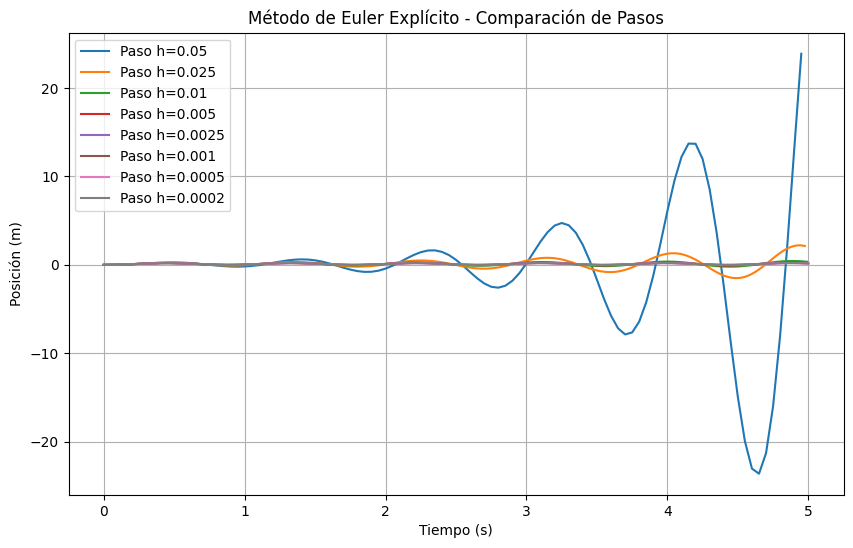

In [ ]:

# Gráfico comparativo
plt.figure(figsize=(10, 6))

for paso_h in pasos_h:
    tiempo, valores_y, _ = euler_explicito(sistema_cambio_de_variable, y0, v0, paso_h, INTERVALO_T)
    plt.plot(tiempo, valores_y, label=f"Paso h={paso_h}")

plt.title("Método de Euler Explícito - Comparación de Pasos")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.legend()
plt.grid(True)
plt.show()

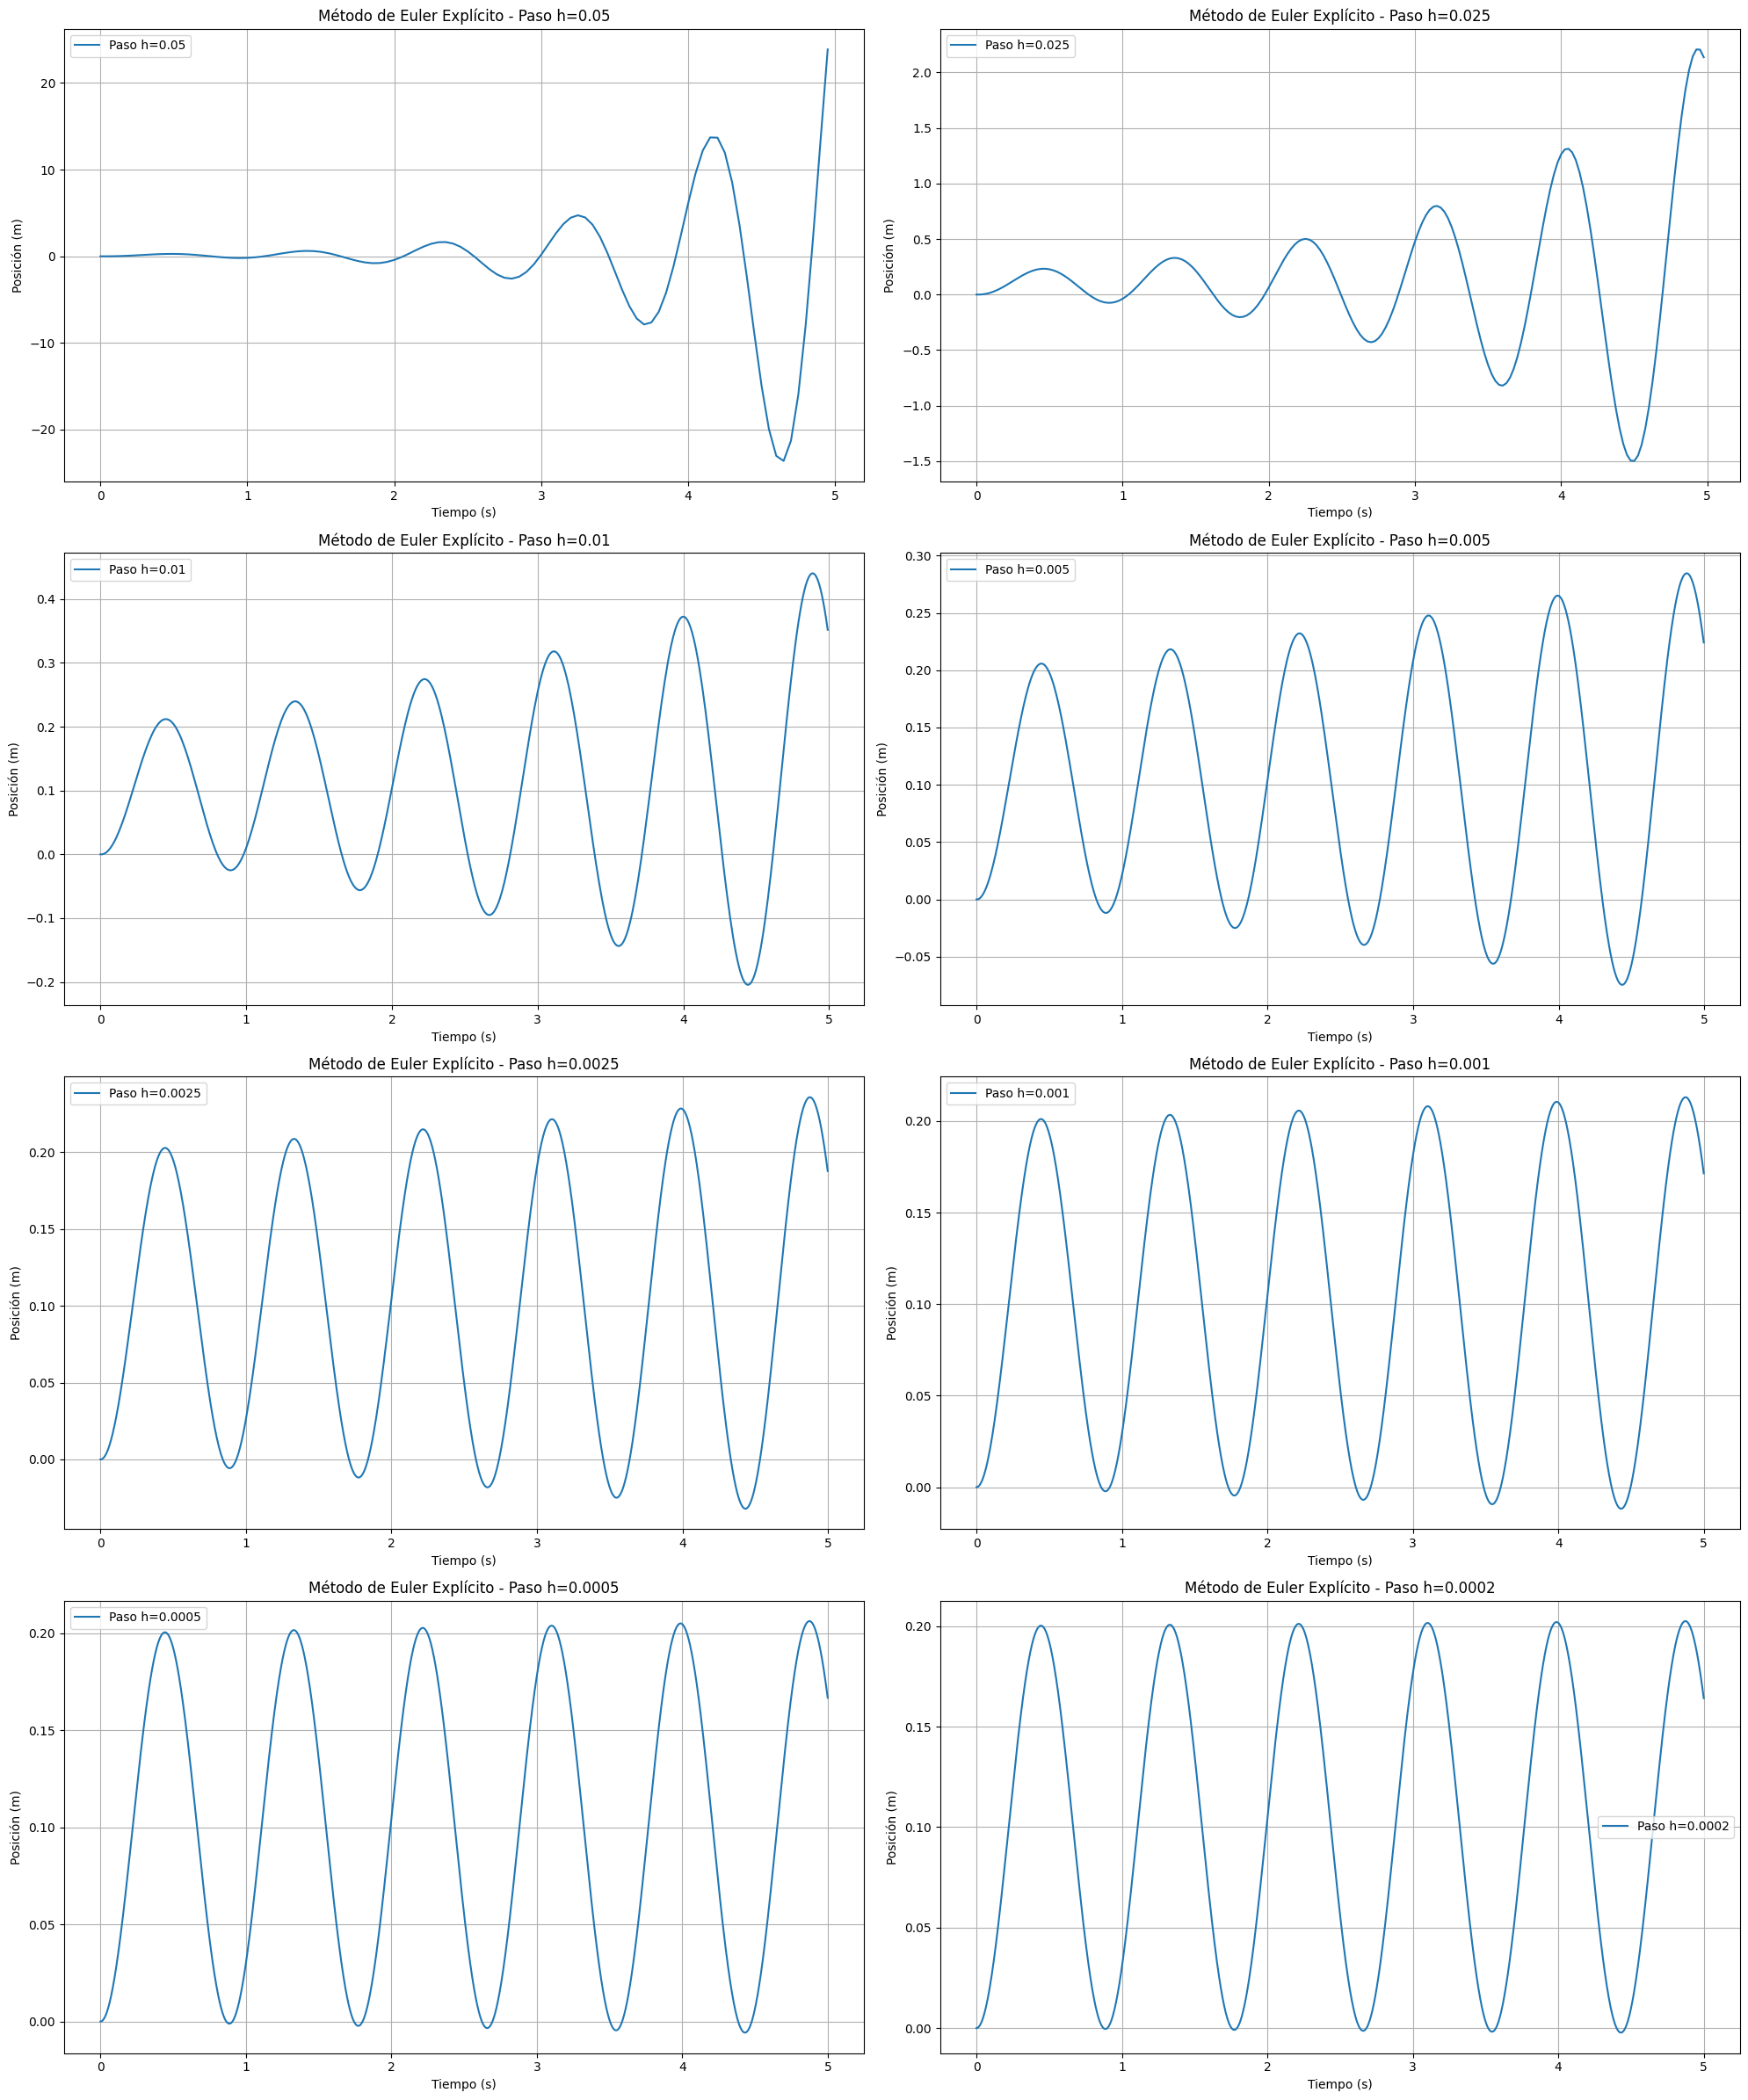

In [ ]:
# Calcula el número de filas necesario para los subplots, redondeando hacia arriba
n_filas = int(np.ceil(len(pasos_h) / 2))
n_columnas = 2

# La altura de cada subplot será 6 y el ancho total será de 20 (2 columnas de 10 de ancho cada una)
plt.figure(figsize=(20, 6 * n_filas))

for i, paso_h in enumerate(pasos_h):
    plt.subplot(n_filas, n_columnas, i + 1)  # Crea un subplot para cada paso de tiempo
    tiempo, valores_y, _ = euler_explicito(sistema_cambio_de_variable, y0, v0, paso_h, INTERVALO_T)
    plt.plot(tiempo, valores_y, label=f"Paso h={paso_h}")
    plt.title(f"Método de Euler Explícito - Paso h={paso_h}")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Posición (m)")
    plt.legend()
    plt.grid(True)

plt.tight_layout()  # Ajusta automáticamente los subplots para que encajen en la figura

##### Analisis velocidad

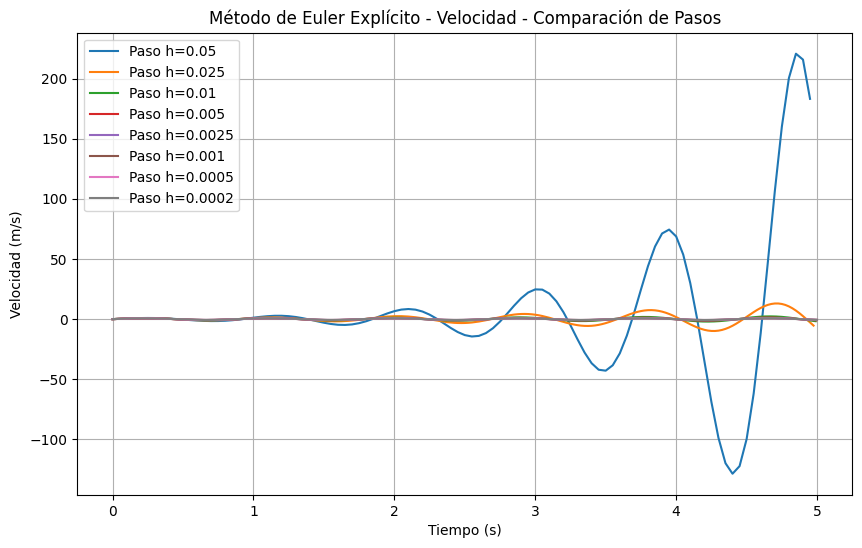

In [ ]:

# Gráfico comparativo
plt.figure(figsize=(10, 6))

for paso_h in pasos_h:
    tiempo, _, valores_v = euler_explicito(sistema_cambio_de_variable, y0, v0, paso_h, INTERVALO_T)
    plt.plot(tiempo, valores_v, label=f"Paso h={paso_h}")

plt.title("Método de Euler Explícito - Velocidad - Comparación de Pasos")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.legend()
plt.grid(True)
plt.show()

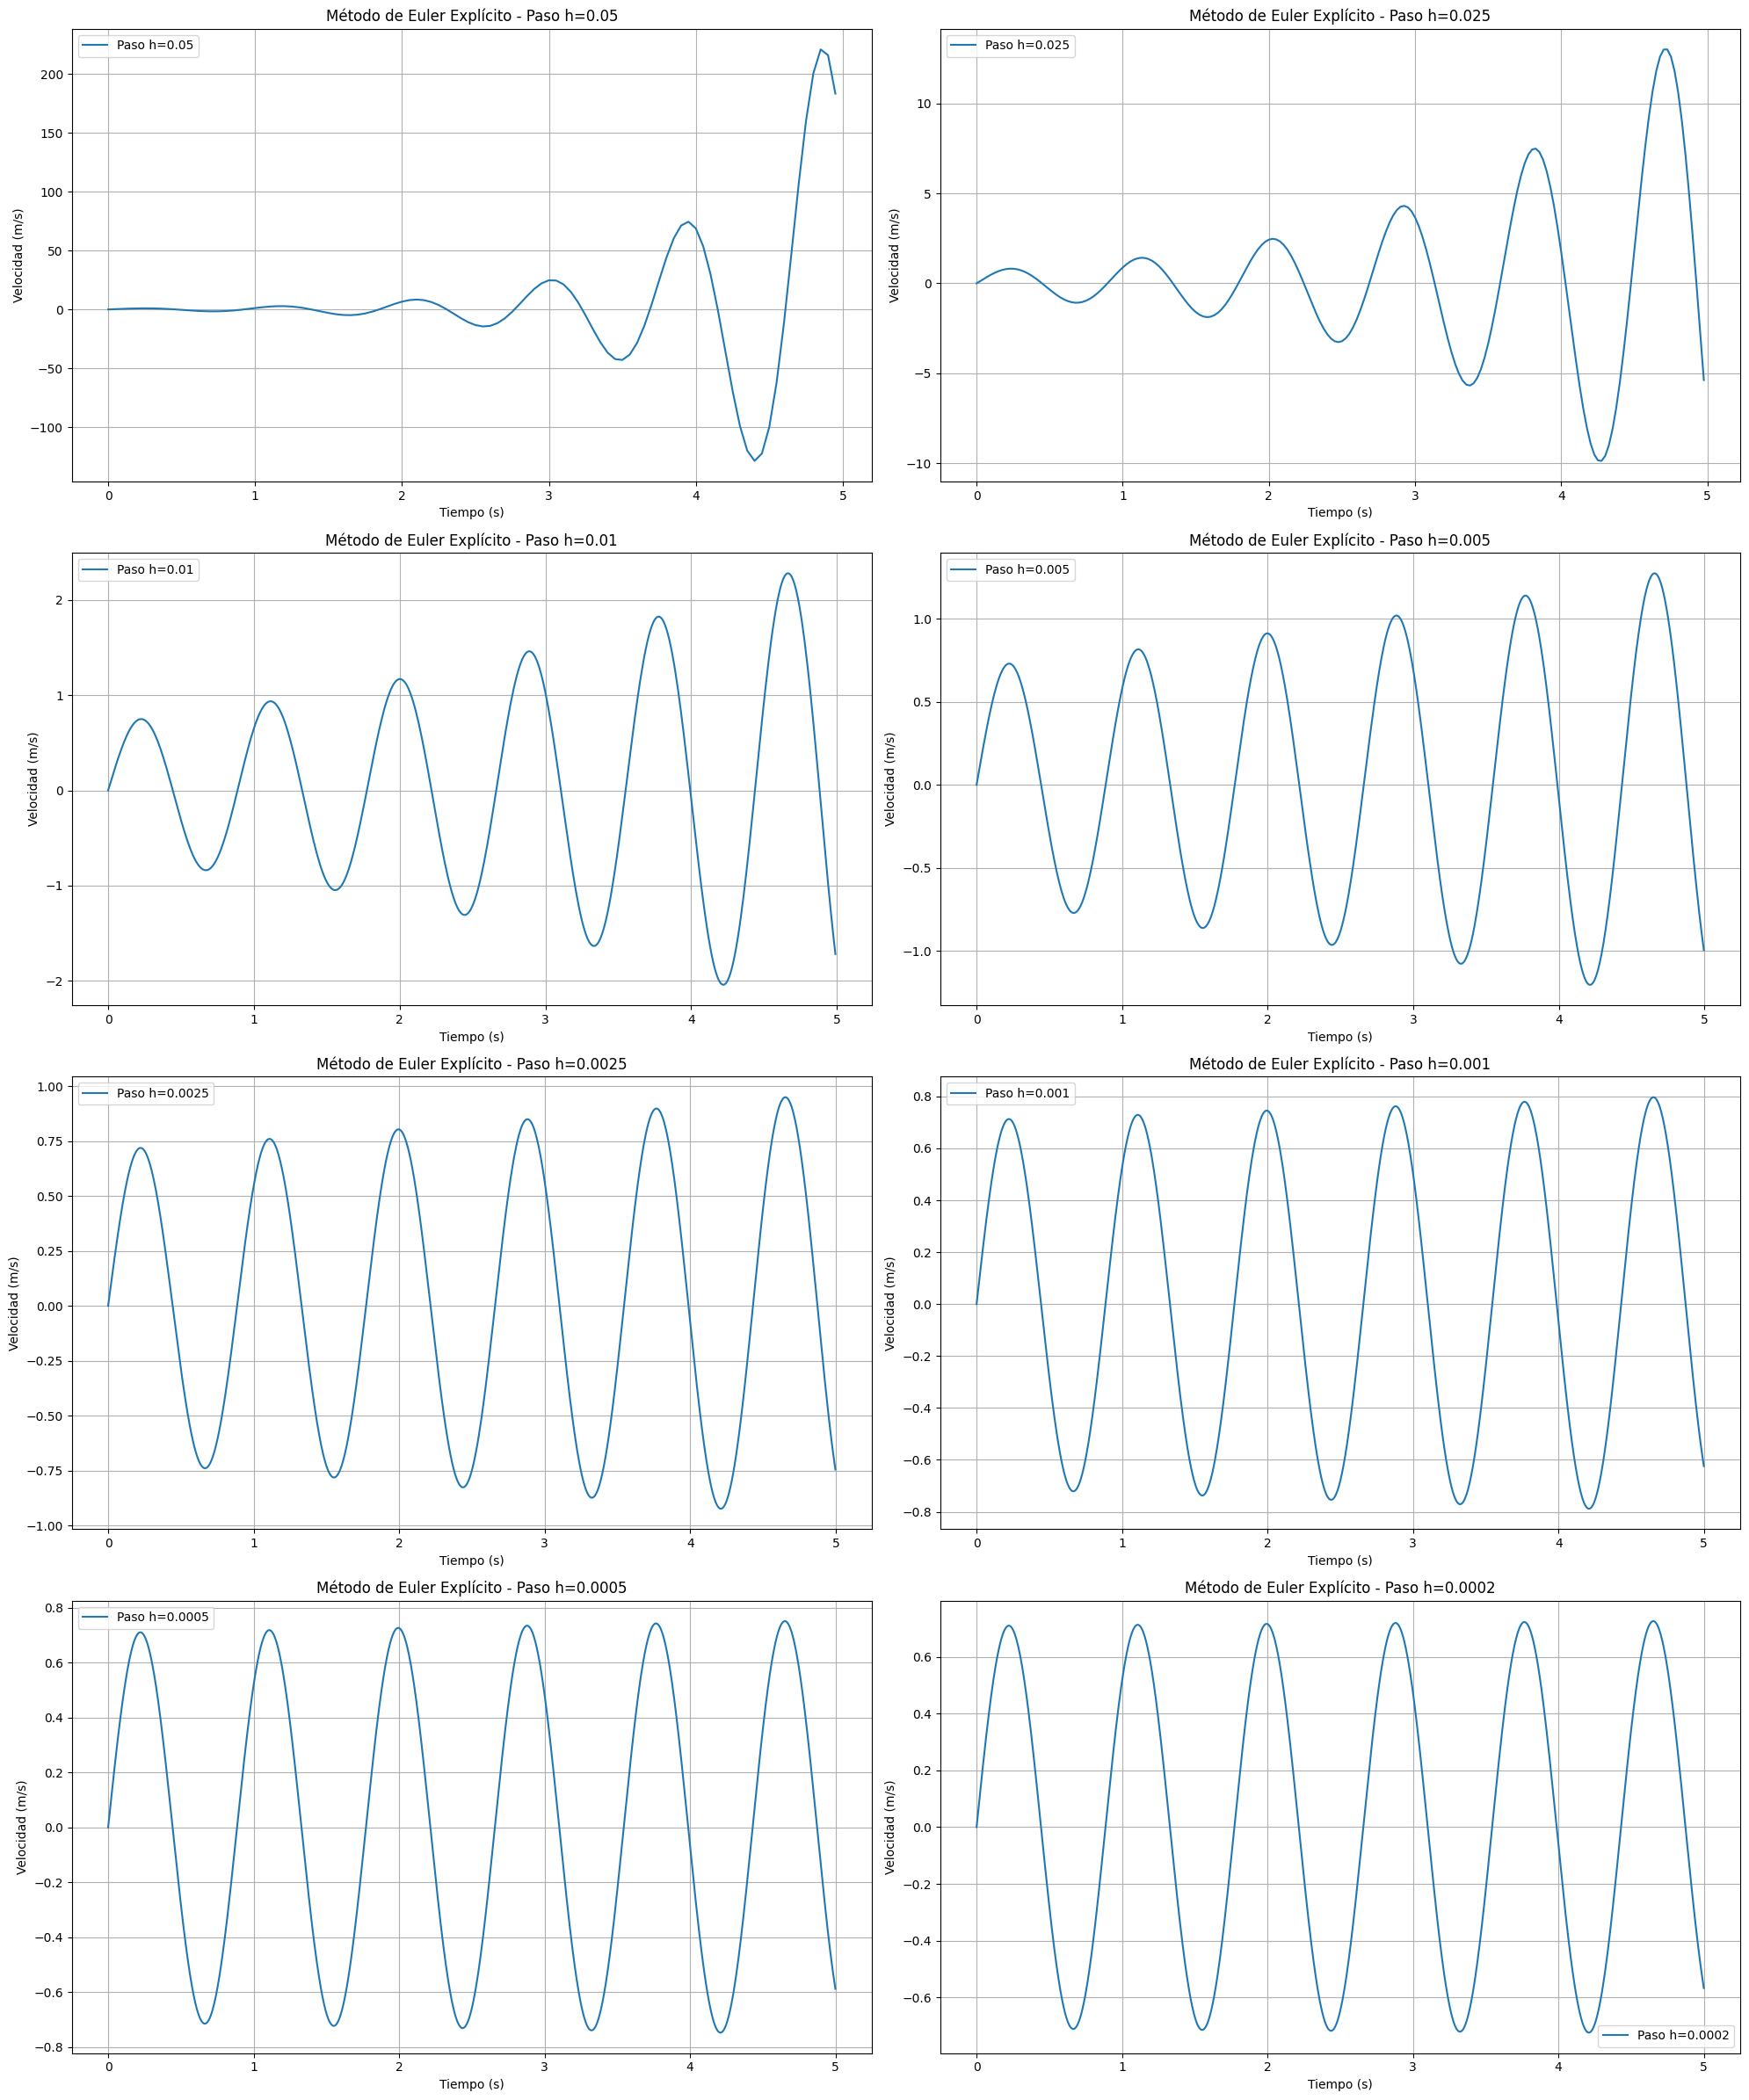

In [ ]:
# Calcula el número de filas necesario para los subplots, redondeando hacia arriba
n_filas = int(np.ceil(len(pasos_h) / 2))
n_columnas = 2

# La altura de cada subplot será 6 y el ancho total será de 20 (2 columnas de 10 de ancho cada una)
plt.figure(figsize=(20, 6 * n_filas))

for i, paso_h in enumerate(pasos_h):
    plt.subplot(n_filas, n_columnas, i + 1)  # Crea un subplot para cada paso de tiempo
    tiempo, _, valores_v = euler_explicito(sistema_cambio_de_variable, y0, v0, paso_h, INTERVALO_T)
    plt.plot(tiempo, valores_v, label=f"Paso h={paso_h}")
    plt.title(f"Método de Euler Explícito - Paso h={paso_h}")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Velocidad (m/s)")
    plt.legend()
    plt.grid(True)

plt.tight_layout()  # Ajusta automáticamente los subplots para que encajen en la figura

##### Analisis error

In [ ]:
analitica_runge_kutta = (tiempo_analitico, valores_y_analitico)

Voy a comparar el error con los 3 pasos de menor tamaño: 0.001, 0.0005, 0.0002

In [ ]:
paso_1 = 0.001
paso_2 = 0.0005
paso_3 = 0.0002

t_euler_exp_paso_1, val_y_euler_exp_paso_1, _ = euler_explicito(sistema_cambio_de_variable, y0, v0, paso_1, INTERVALO_T)
t_euler_exp_paso_2, val_y_euler_exp_paso_2, _ = euler_explicito(sistema_cambio_de_variable, y0, v0, paso_2, INTERVALO_T)
t_euler_exp_paso_3, val_y_euler_exp_paso_3, _ = euler_explicito(sistema_cambio_de_variable, y0, v0, paso_3, INTERVALO_T)


In [ ]:
euler_explicito_paso_1 = (t_euler_exp_paso_1, val_y_euler_exp_paso_1)
tiempos_emparejados_euler_exp_paso_1, valores_emparejados_euler_exp_paso_1 = emparejar_tiempos_valores(euler_explicito_paso_1, analitica_runge_kutta)

In [ ]:
euler_explicito_paso_2 = (t_euler_exp_paso_2, val_y_euler_exp_paso_2)
tiempos_emparejados_euler_exp_paso_2, valores_emparejados_euler_exp_paso_2 = emparejar_tiempos_valores(euler_explicito_paso_2, analitica_runge_kutta)

In [ ]:
euler_explicito_paso_3 = (t_euler_exp_paso_3, val_y_euler_exp_paso_3)
tiempos_emparejados_euler_exp_paso_3, valores_emparejados_euler_exp_paso_3 = emparejar_tiempos_valores(euler_explicito_paso_3, analitica_runge_kutta)

In [ ]:
error_1_euler_explicito = calcular_error(np.array(valores_emparejados_euler_exp_paso_1), np.array(val_y_euler_exp_paso_1))
error_2_euler_explicito = calcular_error(np.array(valores_emparejados_euler_exp_paso_2), np.array(val_y_euler_exp_paso_2))
error_3_euler_explicito = calcular_error(np.array(valores_emparejados_euler_exp_paso_3), np.array(val_y_euler_exp_paso_3))

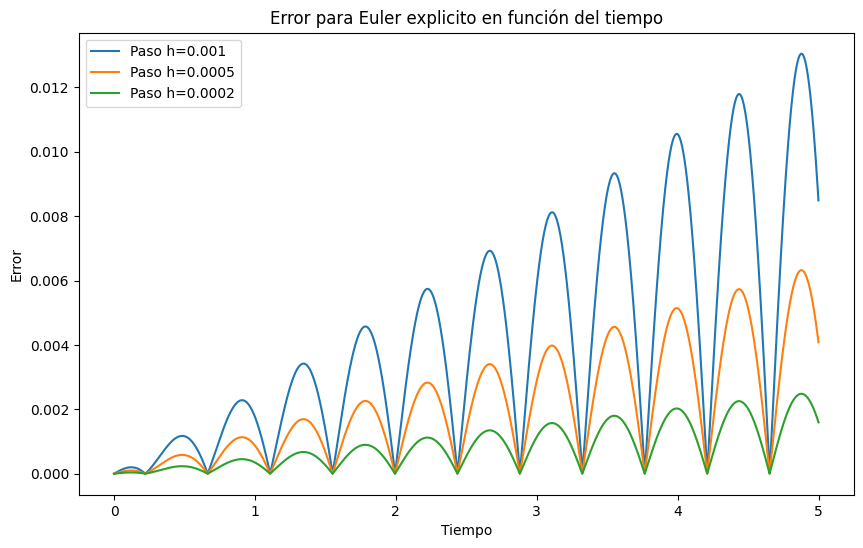

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(tiempos_emparejados_euler_exp_paso_1, error_1_euler_explicito, label=f'Paso h={paso_1}')
plt.plot(tiempos_emparejados_euler_exp_paso_2, error_2_euler_explicito, label=f'Paso h={paso_2}')
plt.plot(tiempos_emparejados_euler_exp_paso_3, error_3_euler_explicito, label=f'Paso h={paso_3}')

plt.xlabel('Tiempo')
plt.ylabel('Error')
plt.title('Error para Euler explicito en función del tiempo')
plt.legend()


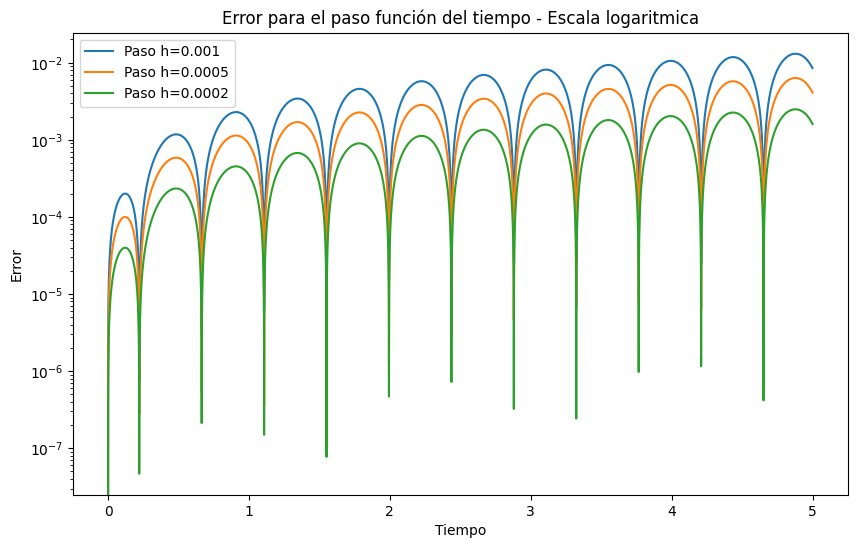

In [ ]:
plt.figure(figsize=(10, 6))

plt.loglog(tiempos_emparejados_euler_exp_paso_1, error_1_euler_explicito, label=f'Paso h={paso_1}')
plt.loglog(tiempos_emparejados_euler_exp_paso_2, error_2_euler_explicito, label=f'Paso h={paso_2}')
plt.loglog(tiempos_emparejados_euler_exp_paso_3, error_3_euler_explicito, label=f'Paso h={paso_3}')

plt.xlabel('Tiempo')
plt.ylabel('Error')
plt.title('Error para el paso función del tiempo - Escala logaritmica')
plt.legend()
# Cambiar la escala del eje x a lineal
plt.xscale('linear')

#### Euler Implicito

##### Analisis posicion

In [ ]:
def paso_siguiente(u,v,paso):
    """
    Calculo el paso siguiente de Un y Vn, es decir, Un+1 y Vn+1
    """
    v_sig = (v+(paso*k*(c-u)+lambda_*c_prima)*(1/m))/(1+(lambda_+(paso*paso)*k)*(1/m))
    u_sig = u + paso*v_sig

    return u_sig , v_sig


def euler_implicito(funcion, u0, v0, paso_h, intervalo_t):
    # Creamos vector tiempo desde 0 hasta intervalo_t, con un paso_h.
    # Aca guardamos los puntos en el tiempo donde vamos a evaluar la solución.
    tiempo = np.arange(0, intervalo_t, paso_h)

    valores_u = []
    valores_v = []

    # seteamos condiciones iniciales
    u = u0
    v = v0


    # Recorremos los puntos en el tiempo.
    for t in tiempo:
        # Guardo el valor obtenido para el paso actual en los vectores.
        valores_u.append(u)
        valores_v.append(v)

        u, v = funcion(u, v, paso_h)


    return tiempo, valores_u, valores_v

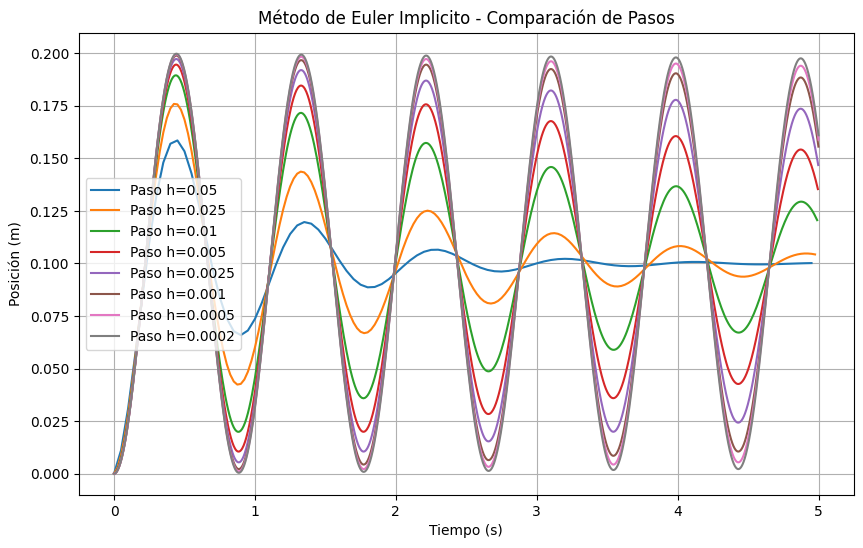

In [ ]:
# Gráfico comparativo
plt.figure(figsize=(10, 6))

for paso_h in pasos_h:
    tiempo, valores_y, _ = euler_implicito(paso_siguiente, y0, v0, paso_h, INTERVALO_T)
    plt.plot(tiempo, valores_y, label=f"Paso h={paso_h}")

plt.title("Método de Euler Implicito - Comparación de Pasos")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.legend()
plt.grid(True)
plt.show()

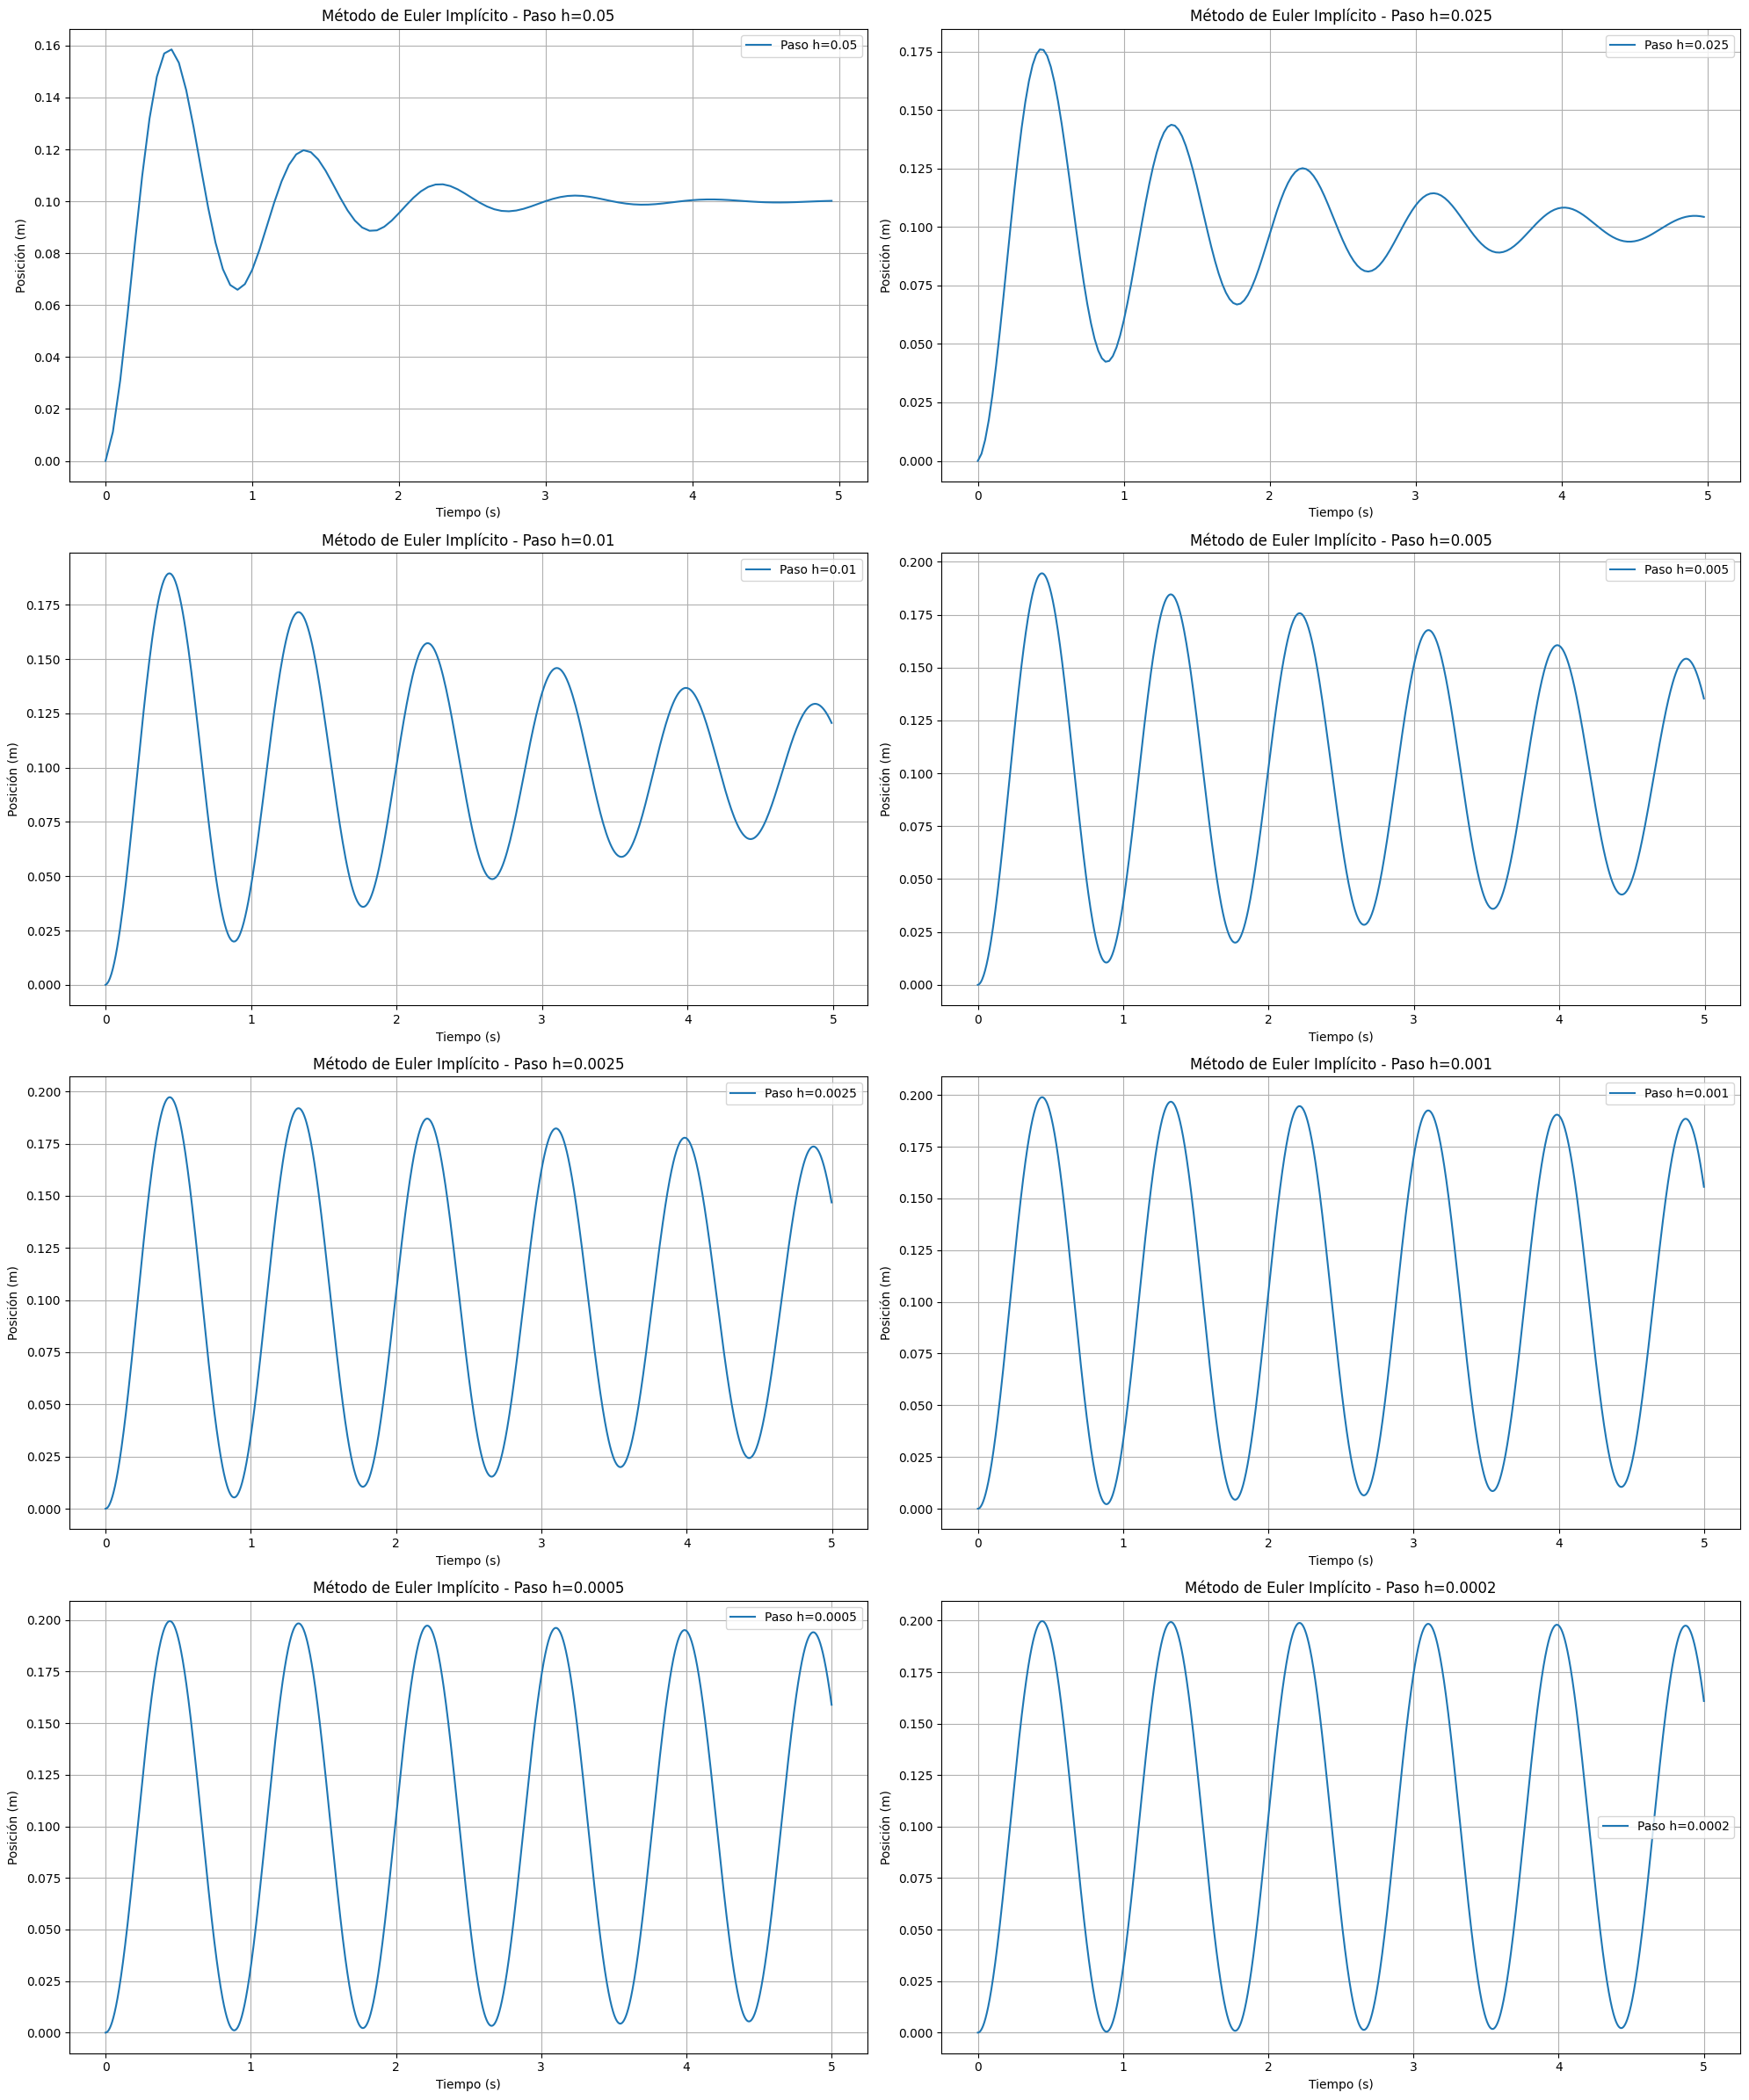

In [ ]:
# Calcula el número de filas necesario para los subplots, redondeando hacia arriba
n_filas = int(np.ceil(len(pasos_h) / 2))
n_columnas = 2

# La altura de cada subplot será 6 y el ancho total será de 20 (2 columnas de 10 de ancho cada una)
plt.figure(figsize=(20, 6 * n_filas))

for i, paso_h in enumerate(pasos_h):
    plt.subplot(n_filas, n_columnas, i + 1)  # Crea un subplot para cada paso de tiempo
    tiempo, valores_y, _ = euler_implicito(paso_siguiente, y0, v0, paso_h, INTERVALO_T)
    plt.plot(tiempo, valores_y, label=f"Paso h={paso_h}")
    plt.title(f"Método de Euler Implícito - Paso h={paso_h}")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Posición (m)")
    plt.legend()
    plt.grid(True)

plt.tight_layout()  # Ajusta automáticamente los subplots para que encajen en la figura

##### Analisis error

In [ ]:
analitica_runge_kutta = (tiempo_analitico, valores_y_analitico)

Voy a comparar el error con los 3 pasos de menor tamaño: 0.001, 0.0005, 0.0002

In [ ]:
paso_1 = 0.001
paso_2 = 0.0005
paso_3 = 0.0002

t_euler_imp_paso_1, val_y_euler_imp_paso_1, _ = euler_implicito(paso_siguiente, y0, v0, paso_1, INTERVALO_T)
t_euler_imp_paso_2, val_y_euler_imp_paso_2, _ = euler_implicito(paso_siguiente, y0, v0, paso_2, INTERVALO_T)
t_euler_imp_paso_3, val_y_euler_imp_paso_3, _ = euler_implicito(paso_siguiente, y0, v0, paso_3, INTERVALO_T)


In [ ]:
euler_implicito_paso_1 = (t_euler_imp_paso_1, val_y_euler_imp_paso_1)
tiempos_emparejados_euler_imp_paso_1, valores_emparejados_euler_imp_paso_1 = emparejar_tiempos_valores(euler_implicito_paso_1, analitica_runge_kutta)

In [ ]:
euler_implicito_paso_2 = (t_euler_imp_paso_2, val_y_euler_imp_paso_2)
tiempos_emparejados_euler_imp_paso_2, valores_emparejados_euler_imp_paso_2 = emparejar_tiempos_valores(euler_implicito_paso_2, analitica_runge_kutta)

In [ ]:
euler_implicito_paso_3 = (t_euler_imp_paso_3, val_y_euler_imp_paso_3)
tiempos_emparejados_euler_imp_paso_3, valores_emparejados_euler_imp_paso_3 = emparejar_tiempos_valores(euler_implicito_paso_3, analitica_runge_kutta)

In [ ]:
error_1_euler_implicito = calcular_error(np.array(valores_emparejados_euler_imp_paso_1), np.array(val_y_euler_imp_paso_1))
error_2_euler_implicito = calcular_error(np.array(valores_emparejados_euler_imp_paso_2), np.array(val_y_euler_imp_paso_2))
error_3_euler_implicito = calcular_error(np.array(valores_emparejados_euler_imp_paso_3), np.array(val_y_euler_imp_paso_3))

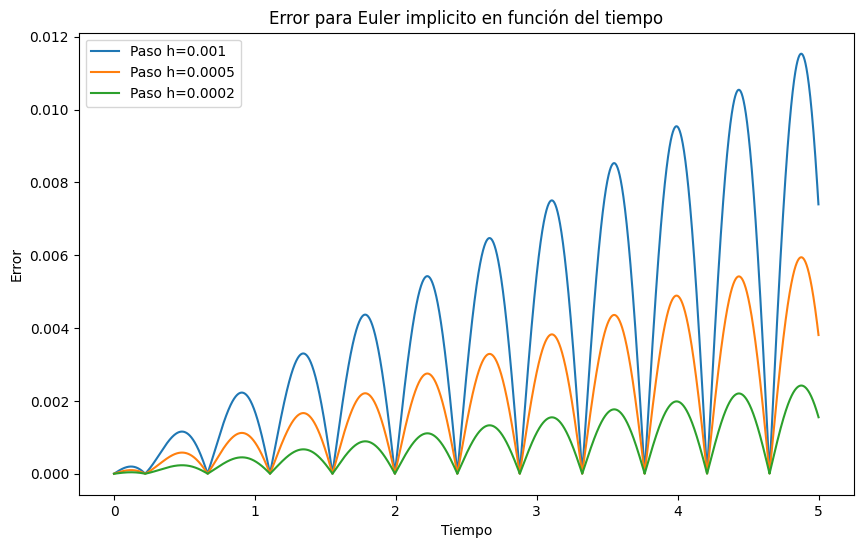

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(tiempos_emparejados_euler_imp_paso_1, error_1_euler_implicito, label=f'Paso h={paso_1}')
plt.plot(tiempos_emparejados_euler_imp_paso_2, error_2_euler_implicito, label=f'Paso h={paso_2}')
plt.plot(tiempos_emparejados_euler_imp_paso_3, error_3_euler_implicito, label=f'Paso h={paso_3}')

plt.xlabel('Tiempo')
plt.ylabel('Error')
plt.title('Error para Euler implicito en función del tiempo')
plt.legend()


#### Runge Kutta

##### Analisis posicion

In [ ]:
def calculo_q(u,v,paso):
    """
    Calculamos las q's
    """
    q1u = paso*v
    q1v = paso*((1/m)*(k*(c-u)+lambda_*(c_prima-v)))

    q2u = paso*(v+q1v)
    q2v = paso*((1/m)*(k*(c-(u+q1u))+lambda_*(c_prima-(v+q1v))))

    return q1u,q2u,q1v,q2v

def runge_kutta(funcion, u0, v0, paso_h, intervalo_t):
    # Creamos vector tiempo desde 0 hasta intervalo_t, con un paso_h.
    # Aca guardamos los puntos en el tiempo donde vamos a evaluar la solución.
    tiempo = np.arange(0, intervalo_t, paso_h)


    valores_u = []
    valores_v = []

    # seteamos condiciones iniciales
    u = u0
    v = v0

    # Recorremos los puntos en el tiempo.
    for t in tiempo:
        # Guardo el valor obtenido para el paso actual en los vectores.
        valores_u.append(u)
        valores_v.append(v)

        q1u,q2u,q1v,q2v = calculo_q(u,v,paso_h)

        u += 0.5*(q1u+q2u)
        v += 0.5*(q1v+q2v)

    return tiempo, valores_u, valores_v


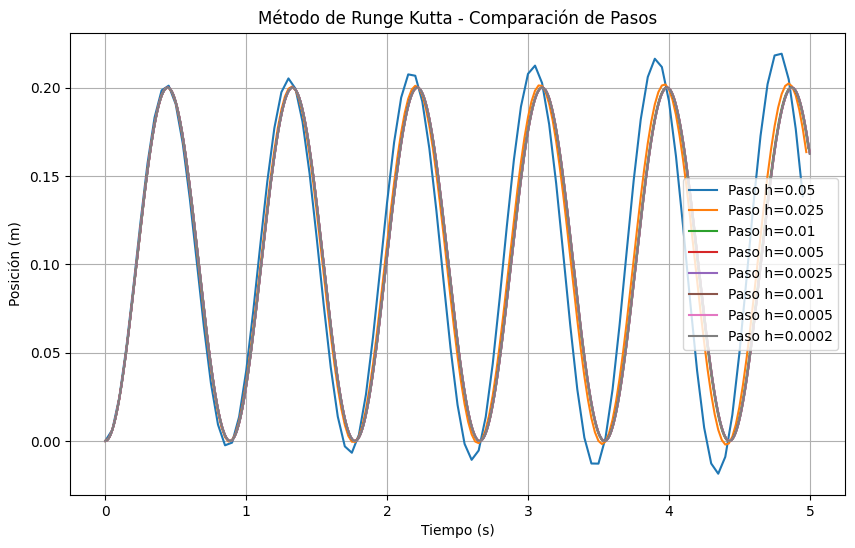

In [ ]:
# Gráfico comparativo
plt.figure(figsize=(10, 6))

for paso_h in pasos_h:
    tiempo, valores_y, _ = runge_kutta(calculo_q, y0, v0, paso_h, INTERVALO_T)
    plt.plot(tiempo, valores_y, label=f"Paso h={paso_h}")

plt.title("Método de Runge Kutta - Comparación de Pasos")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.legend()
plt.grid(True)
plt.show()

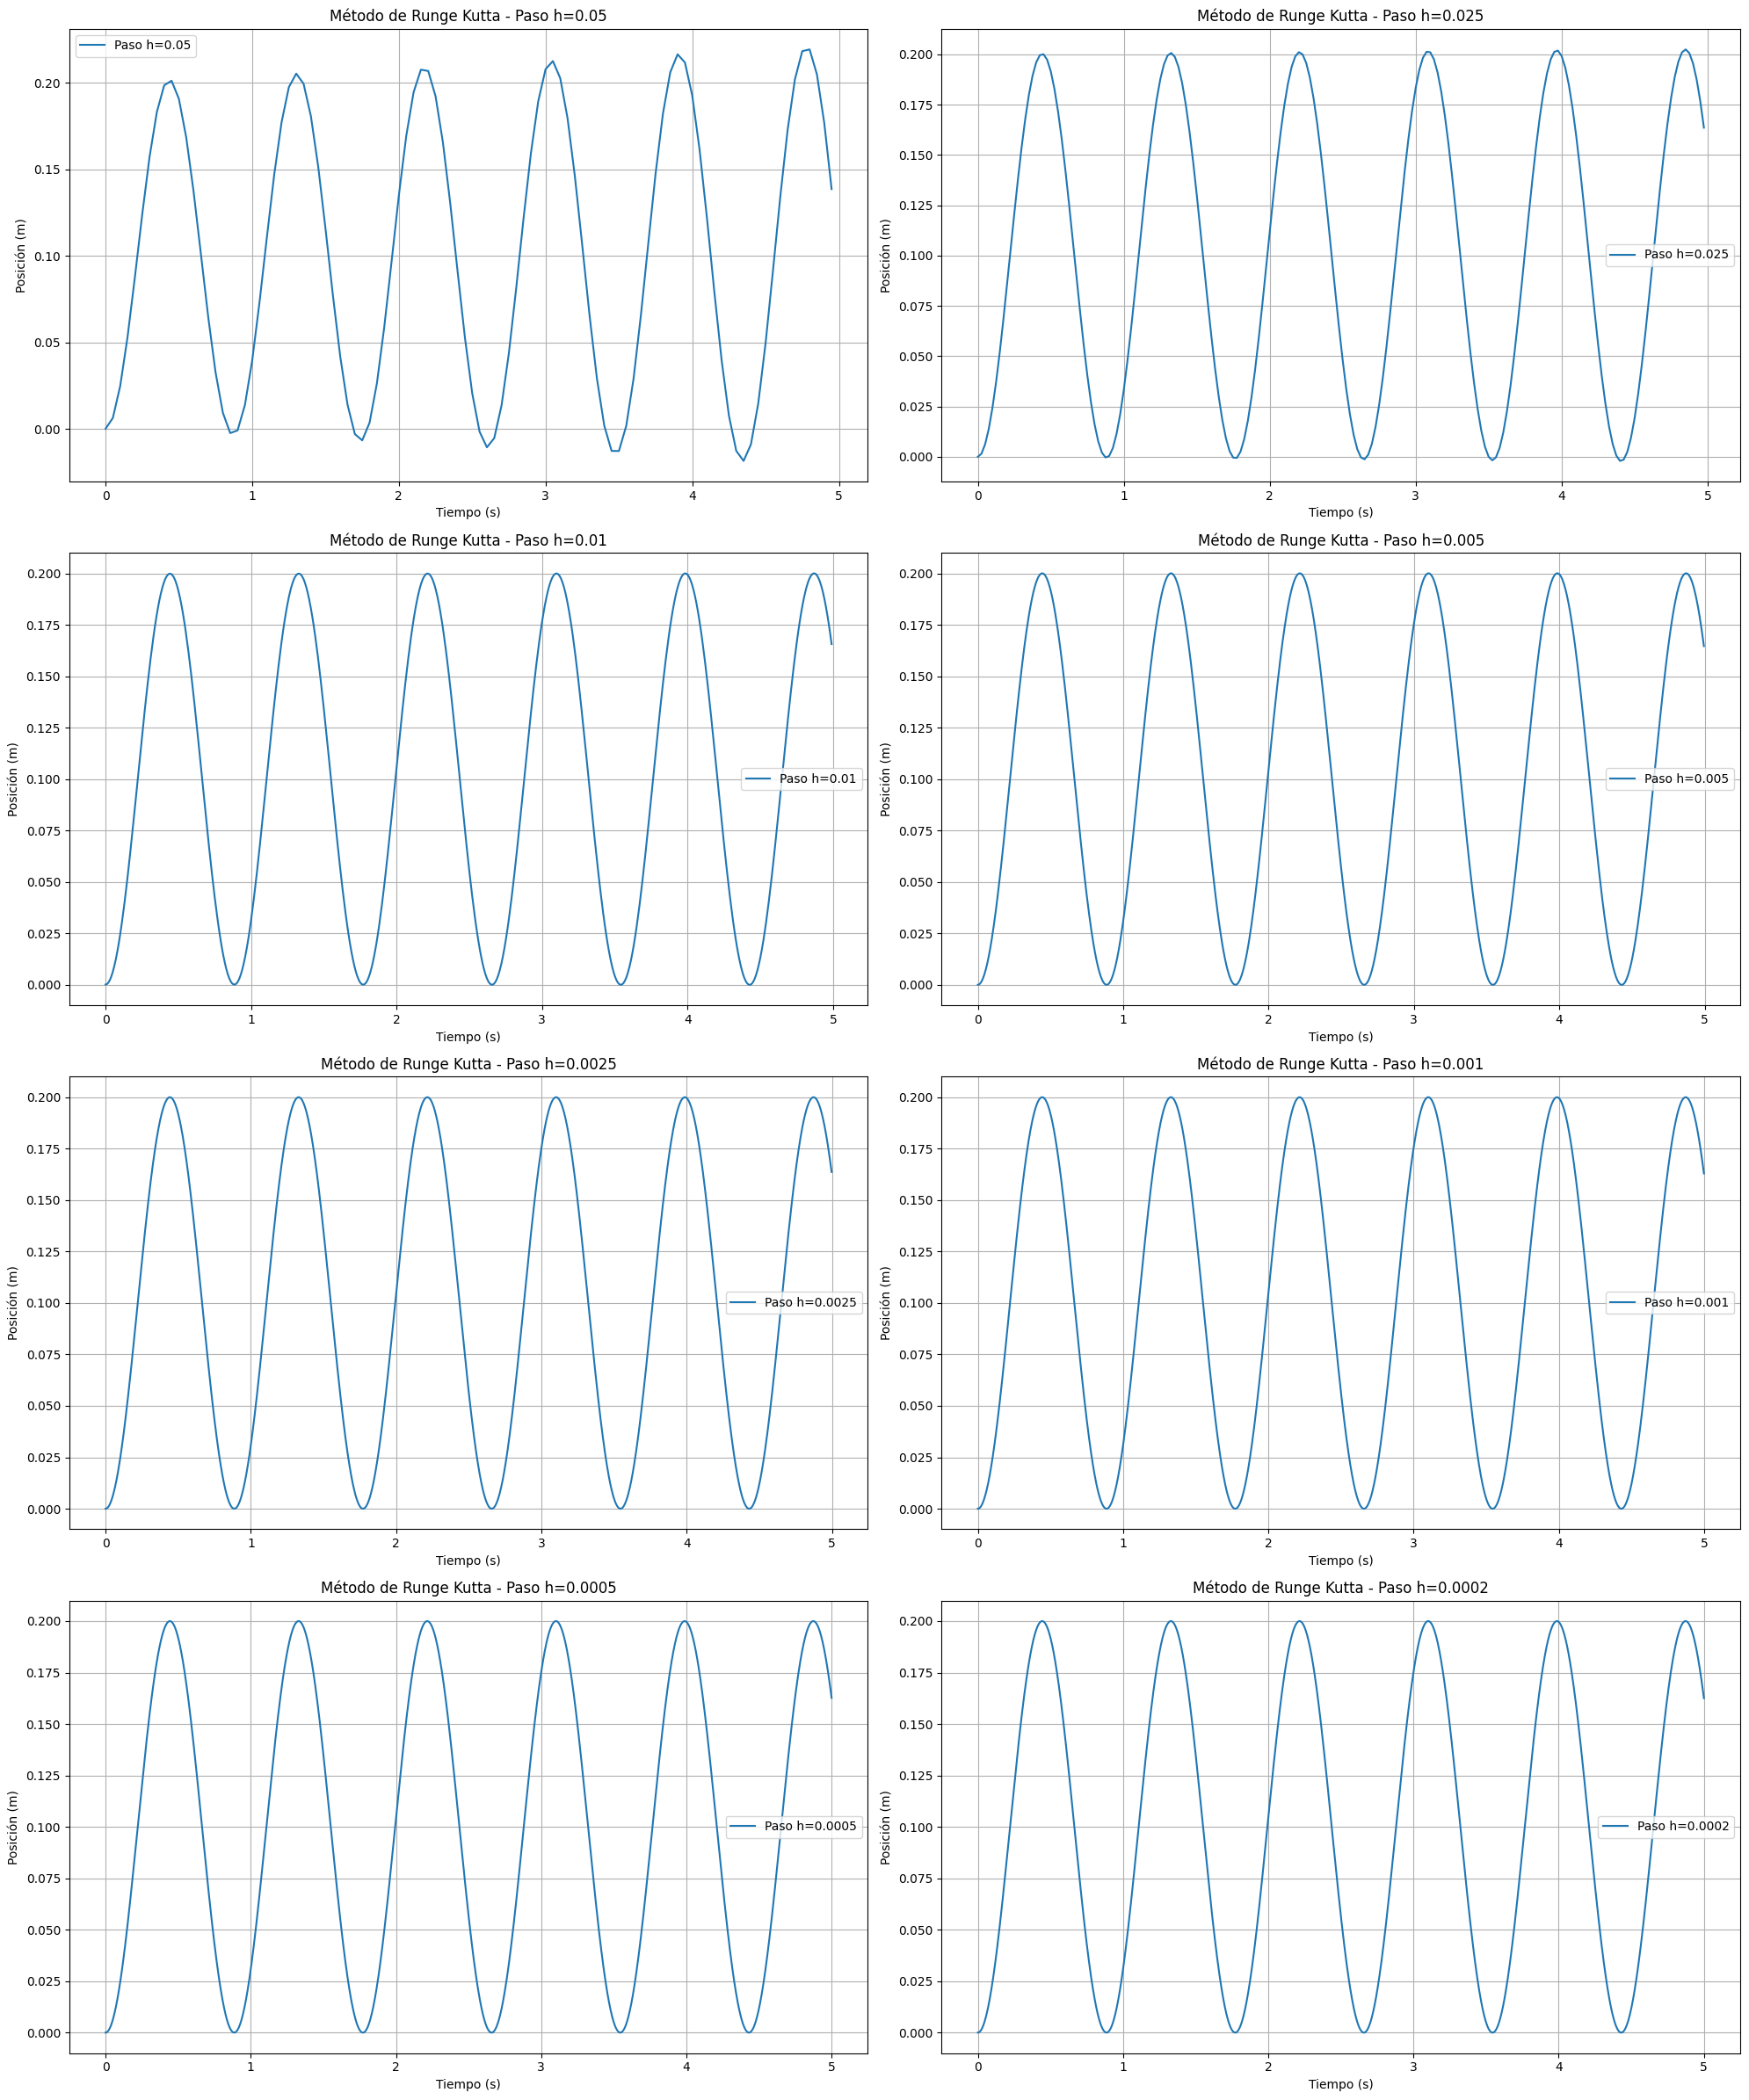

In [ ]:
# Calcula el número de filas necesario para los subplots, redondeando hacia arriba
n_filas = int(np.ceil(len(pasos_h) / 2))
n_columnas = 2

# La altura de cada subplot será 6 y el ancho total será de 20 (2 columnas de 10 de ancho cada una)
plt.figure(figsize=(20, 6 * n_filas))

for i, paso_h in enumerate(pasos_h):
    plt.subplot(n_filas, n_columnas, i + 1)  # Crea un subplot para cada paso de tiempo
    tiempo, valores_y, _ = runge_kutta(calculo_q, y0, v0, paso_h, INTERVALO_T)
    plt.plot(tiempo, valores_y, label=f"Paso h={paso_h}")
    plt.title(f"Método de Runge Kutta - Paso h={paso_h}")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Posición (m)")
    plt.legend()
    plt.grid(True)

plt.tight_layout()  # Ajusta automáticamente los subplots para que encajen en la figura

##### Analisis error

In [ ]:
analitica_runge_kutta = (tiempo_analitico, valores_y_analitico)

Voy a comparar el error con los pasos : 0.01, 0.005, 0.0025

In [ ]:
paso_1 = 0.005
paso_2 = 0.0025
paso_3 = 0.001

t_rk_paso_1, val_y_rk_paso_1, _ = runge_kutta(calculo_q, y0, v0, paso_1, INTERVALO_T)
t_rk_paso_2, val_y_rk_paso_2, _ = runge_kutta(calculo_q, y0, v0, paso_2, INTERVALO_T)
t_rk_paso_3, val_y_rk_paso_3, _ = runge_kutta(calculo_q, y0, v0, paso_3, INTERVALO_T)


In [ ]:
rk_paso_1 = (t_rk_paso_1, val_y_rk_paso_1)
tiempos_emparejados_rk_paso_1, valores_emparejados_rk_paso_1 = emparejar_tiempos_valores(rk_paso_1, analitica_runge_kutta)

In [ ]:
rk_paso_2 = (t_rk_paso_2, val_y_rk_paso_2)
tiempos_emparejados_rk_paso_2, valores_emparejados_rk_paso_2 = emparejar_tiempos_valores(rk_paso_2, analitica_runge_kutta)

In [ ]:
rk_paso_3 = (t_rk_paso_3, val_y_rk_paso_3)
tiempos_emparejados_rk_paso_3, valores_emparejados_rk_paso_3 = emparejar_tiempos_valores(rk_paso_3, analitica_runge_kutta)

In [ ]:
error_1_rk = calcular_error(np.array(valores_emparejados_rk_paso_1), np.array(val_y_rk_paso_1))
error_2_rk = calcular_error(np.array(valores_emparejados_rk_paso_2), np.array(val_y_rk_paso_2))
error_3_rk = calcular_error(np.array(valores_emparejados_rk_paso_3), np.array(val_y_rk_paso_3))

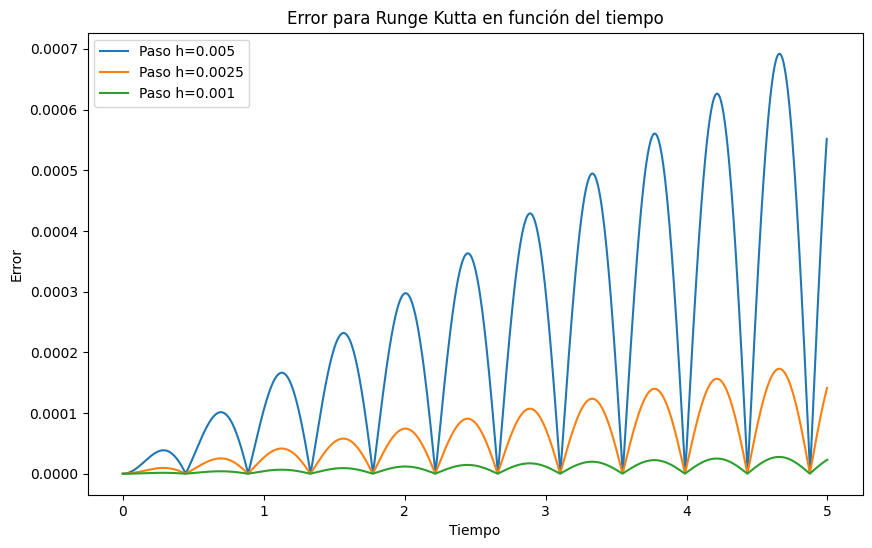

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(tiempos_emparejados_rk_paso_1, error_1_rk, label=f'Paso h={paso_1}')
plt.plot(tiempos_emparejados_rk_paso_2, error_2_rk, label=f'Paso h={paso_2}')
plt.plot(tiempos_emparejados_rk_paso_3, error_3_rk, label=f'Paso h={paso_3}')

plt.xlabel('Tiempo')
plt.ylabel('Error')
plt.title('Error para Runge Kutta en función del tiempo')
plt.legend()


### 1.2. Corroborar experimentalmente si la frecuencia natural de oscilación se corresponde con su expresión analítica: 𝜔𝑛 = √𝑘/𝑚.

Voy a sacar la frecuencia experimental, usando la formula de la frecuencia angular, esta formula es: ω=2π​/T.

Para poder usarla, necesito obtener el periodo T, que en el contexto de oscilaciones armónicas es la duración  de un ciclo completo de oscilación, es decir cuantas radianes se recorren en un segundo.

**¿Cómo identifico el periodo T?**

Una forma experimental de hacerlo es encontrar los puntos máximos/minimos y calcular la diferencia en tiempo entre dos de esos puntos que se encuentren consecutivos para obtener la duración de un periodo.

Para nuestro casos, vamos a calcular el periodo para cada par de puntos maximos/minimos que tengamos y vamos a sacar el promedio.

Ese periodo promedio lo vamos a meter en la formula para obtener la frecuencia experimental de oscilacion.


**Aproximaciones numéricas:**

Para nuestras aproximaciones vamos a obtener los puntos maximos/minimos de la posicion, calcular el periodo promedio y obtener la frecuencia experimental


In [ ]:
## Importo lib para encontrar los picos de un array de puntos
from scipy.signal import find_peaks


In [ ]:
## Creo funciones para ejecutar cada método con el paso_h = 0.005

def ejecutar_euler_explicito(y0, v0, paso_h, intervalo):
    return euler_explicito(sistema_cambio_de_variable, y0, v0, paso_h, intervalo)

def ejecutar_euler_implicito(y0, v0, paso_h, intervalo):
    return euler_implicito(paso_siguiente, y0, v0, paso_h, intervalo)

def ejecutar_runge_kutta(y0, v0, paso_h, intervalo):
    return runge_kutta(calculo_q, y0, v0, paso_h, intervalo)

In [ ]:
paso_frecuencia = 0.001

In [ ]:



# Uso la formula brindada para la frecuencia natural de oscilación de forma analitica
frecuencia_calculada = np.sqrt(k / m)

# Resuelvo con cada método
tiempo_euler_explicito, valores_y_euler_explicito, _ = ejecutar_euler_explicito(y0, v0, paso_frecuencia, INTERVALO_T)
tiempo_euler_implicito, valores_y_euler_implicito, _ = ejecutar_euler_implicito(y0, v0, paso_frecuencia, INTERVALO_T)
tiempo_runge_kutta, valores_y_runge_kutta, _ = ejecutar_runge_kutta(y0, v0, paso_frecuencia, INTERVALO_T)


# Encuentra los índices de los máximos de los puntos obtenidos numericamente
indices_maximos_euler_explicito, _ = find_peaks(valores_y_euler_explicito)
indices_maximos_euler_implicito, _ = find_peaks(valores_y_euler_implicito)
indices_maximos_runge_kutta, runge_kutta = find_peaks(valores_y_runge_kutta)





Grafico de ejemplo con euler explcito

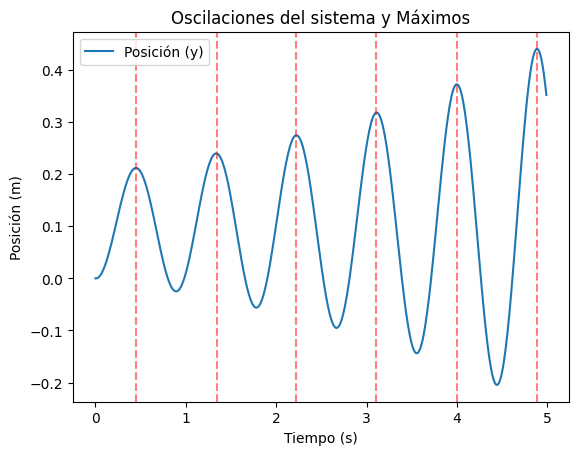

Período promedio euler explicito: 0.8879999999999999
Frecuencia angular experimental euler explicito: 7.075659129706742
Frecuencia natural de oscilación calculada analiticamente: 7.090807734104097 rad/s
Relacion: frecuenca_natural/frecuencia_analitica: 1.0021409460404551 


In [ ]:
# Graficar las oscilaciones y marcar los máximos
plt.plot(tiempo_euler_explicito, valores_y_euler_explicito, label='Posición (y)')


# Marca los máximos en el gráfico
for indice in indices_maximos_euler_explicito:
    plt.axvline(tiempo_euler_explicito[indice], color='r', linestyle='--', alpha=0.5)

plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.title('Oscilaciones del sistema y Máximos')
plt.legend()
plt.show()

# Calcula las diferencias de tiempo entre extremos consecutivos
diferencias_tiempo = np.diff(tiempo_euler_explicito[indices_maximos_euler_explicito])

# Calcula el período promedio
periodo_promedio = np.mean(diferencias_tiempo)

# Calcula la frecuencia angular de forma experimental en base al periodo obtenido
frecuencia_angular_experimental = 2 * np.pi / periodo_promedio

print("Período promedio euler explicito:", periodo_promedio)
print("Frecuencia angular experimental euler explicito:", frecuencia_angular_experimental)
print(f"Frecuencia natural de oscilación calculada analiticamente: {frecuencia_calculada} rad/s")
print(f"Relacion: frecuenca_natural/frecuencia_analitica: {frecuencia_calculada/frecuencia_angular_experimental} ")

Ahora voy a comparar los 3 métodos para ver como se comportan los máximos en cada uno:

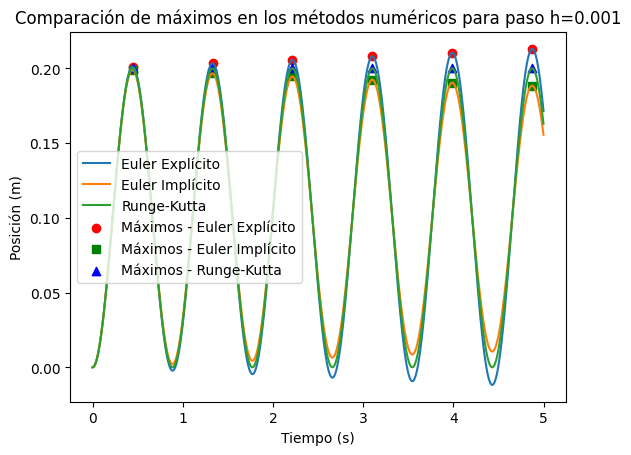

In [ ]:
# Graficar las oscilaciones y marcar los máximos para cada método
plt.plot(tiempo_euler_explicito, valores_y_euler_explicito, label='Euler Explícito')
plt.plot(tiempo_euler_implicito, valores_y_euler_implicito, label='Euler Implícito')
plt.plot(tiempo_runge_kutta, valores_y_runge_kutta, label='Runge-Kutta')

# Marcar los máximos en el gráfico para cada método
plt.scatter(np.array(tiempo_euler_explicito)[indices_maximos_euler_explicito], np.array(valores_y_euler_explicito)[indices_maximos_euler_explicito], color='r', marker='o', label='Máximos - Euler Explícito')
plt.scatter(np.array(tiempo_euler_implicito)[indices_maximos_euler_implicito], np.array(valores_y_euler_implicito)[indices_maximos_euler_implicito], color='g', marker='s', label='Máximos - Euler Implícito')
plt.scatter(np.array(tiempo_runge_kutta)[indices_maximos_runge_kutta], np.array(valores_y_runge_kutta)[indices_maximos_runge_kutta], color='b', marker='^', label='Máximos - Runge-Kutta')

plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.title(f'Comparación de máximos en los métodos numéricos para paso h={paso_frecuencia}')
plt.legend()
plt.show()


En todos los métodos los máximos se alcanzan en el mismo punto del tiempo, lo cual tiene sentido. Cómo conclusión para todos los métodos deberíamos obtener el mismo periodo promedio y por lo tanto la misma frecuencia oscilatoria.

**Calculo la frecuencia para todos:**

Voy a calcular la frecuencia para cada metodo y dividir el resultado obtenido de la ecuación analitica por el resultado de cada método, para obtener un indice de similitud, donde 1 sería un resultado que se obtendría si los dos numeros fueran iguales.

In [ ]:
# Calcula las diferencias de tiempo entre extremos consecutivos
diferencias_tiempo_euler_explicito = np.diff(tiempo_euler_explicito[indices_maximos_euler_explicito])
diferencias_tiempo_euler_implicito = np.diff(tiempo_euler_implicito[indices_maximos_euler_implicito])
diferencias_tiempo_runge_kutta = np.diff(tiempo_runge_kutta[indices_maximos_runge_kutta])

# Calcula el período promedio
periodo_promedio_euler_explicito = np.mean(diferencias_tiempo_euler_explicito)
periodo_promedio_euler_implicito = np.mean(diferencias_tiempo_euler_implicito)
periodo_promedio_runge_kutta = np.mean(diferencias_tiempo_runge_kutta)

# Calcula la frecuencia angular de forma experimental en base al periodo obtenido
frecuencia_angular_experimental_euler_explicito = 2 * np.pi / periodo_promedio_euler_explicito
frecuencia_angular_experimental_euler_implicito = 2 * np.pi / periodo_promedio_euler_implicito
frecuencia_angular_experimental_runge_kutta = 2 * np.pi / periodo_promedio_runge_kutta


print("Período promedio - Euler explicito:", periodo_promedio_euler_explicito)
print("Período promedio - Euler implicito:", periodo_promedio_euler_implicito)
print("Período promedio - Runge kutta:", periodo_promedio_runge_kutta)

print("Frecuencia angular experimental - Euler explicito:", frecuencia_angular_experimental_euler_explicito)
print("Frecuencia angular experimental - Euler implicito:", frecuencia_angular_experimental_euler_implicito)
print("Frecuencia angular experimental - Runge kutta:", frecuencia_angular_experimental_runge_kutta)

print(f"Frecuencia natural de oscilación calculada analiticamente: {frecuencia_calculada} rad/s")

print(f"Relacion: frecuencia_analitica/frecuencia_experimental - Euler explicito: {frecuencia_calculada/frecuencia_angular_experimental_euler_explicito} ")
print(f"Relacion: frecuencia_analitica/frecuencia_experimental - Euler implicito: {frecuencia_calculada/frecuencia_angular_experimental_euler_implicito} ")
print(f"Relacion: frecuencia_analitica/frecuencia_experimental - Runge Kutta: {frecuencia_calculada/frecuencia_angular_experimental_runge_kutta} ")

Período promedio - Euler explicito: 0.8859999999999999
Período promedio - Euler implicito: 0.8859999999999999
Período promedio - Runge kutta: 0.8861999999999999
Frecuencia angular experimental - Euler explicito: 7.091631272211724
Frecuencia angular experimental - Euler implicito: 7.091631272211724
Frecuencia angular experimental - Runge kutta: 7.090030813788746
Frecuencia natural de oscilación calculada analiticamente: 7.090807734104097 rad/s
Relacion: frecuencia_analitica/frecuencia_experimental - Euler explicito: 0.9998838718376611 
Relacion: frecuencia_analitica/frecuencia_experimental - Euler implicito: 0.9998838718376611 
Relacion: frecuencia_analitica/frecuencia_experimental - Runge Kutta: 1.0001095792579406 


Al hacer los calculos se ve que los resultados de los euler son similares. Además se ve que el de Runge kutta comparte 2 decimales con la solucion analitica (7.09). Pareciera ser el que se acerca más al resultado análitico

### 1.3.Estimar experimentalmente el orden de cada método.

Voy a obtener un resultado similar al analitico evualuando runge_kutta en un tamaño de paso muy chico ¿0.0001?

Ese resultado lo voy a suponer como el real y voy a calcular el error de cada metodo con diferentes pasos comparandolo contra el que yo tomo como el verdadero.

In [ ]:
def calcular_orden(error1, error2, paso_1, paso_2):
    """
    Calcula el orden de un método numérico.

    Parámetros:
    - error1: Array de errores para la aproximación 1.
    - error2: Array de errores para la aproximación 2.
    - k: Factor de reducción del paso entre las dos aproximaciones.

    Retorna:
    - orden: Estimación del orden del método numérico.
    """
    promedio_error1 = np.mean(error1)
    promedio_error2 = np.mean(error2)

    print(f'promedio error 1: {promedio_error1}')
    print(f'promedio error 2: {promedio_error2}')

    orden = np.log(promedio_error1 / promedio_error2) / np.log((paso_1/paso_2))
    return abs(orden)


In [ ]:
paso_1 = 0.005
t1_euler_exp, val_y_euler_exp_paso_1, _ = euler_explicito(sistema_cambio_de_variable, y0, v0, paso_1, INTERVALO_T)
t1_euler_imp, val_y_euler_impl_paso_1, _ = ejecutar_euler_implicito(y0, v0, paso_1, INTERVALO_T)
t1_rk, val_y_runge_kutta_paso_1, _ = ejecutar_runge_kutta(y0, v0, paso_1, INTERVALO_T)


Calculo con un segundo paso, la mitad del primero: 0.0025

In [ ]:
paso_2 = 0.0025
t2_euler_exp, val_y_euler_exp_paso_2, _ = ejecutar_euler_explicito(y0, v0, paso_2, INTERVALO_T)
t2_euler_imp, val_y_euler_impl_paso_2, _ = ejecutar_euler_implicito(y0, v0, paso_2, INTERVALO_T)
t2_rk, val_y_runge_kutta_paso_2, _ = ejecutar_runge_kutta(y0, v0, paso_2, INTERVALO_T)

Pruebo con euler_explicito

In [ ]:
euler_explicito = (t1_euler_exp, val_y_euler_exp_paso_1)
analitica_runge_kutta = (tiempo_analitico, valores_y_analitico)

tiempos_emparejados, valores_emparejados = emparejar_tiempos_valores(euler_explicito, analitica_runge_kutta)

In [ ]:
error_1_euler_explicito = calcular_error(np.array(valores_emparejados), np.array(val_y_euler_exp_paso_1))

In [ ]:
euler_explicito_paso_2 = (t2_euler_exp, val_y_euler_exp_paso_2)

tiempos_emparejados_paso_2, valores_emparejados_paso_2 = emparejar_tiempos_valores(euler_explicito_paso_2, analitica_runge_kutta)

In [ ]:
error_2_euler_explicito = calcular_error(np.array(valores_emparejados_paso_2), np.array(val_y_euler_exp_paso_2))

##### Estimacion de orden para euler explicito

In [ ]:

# Calcular el orden
orden_estimado = calcular_orden(error_1_euler_explicito, error_2_euler_explicito, paso_1, paso_2)

# Imprimir el resultado
print("Estimación del orden:", orden_estimado)

promedio error 1: 0.025419386927766303
promedio error 2: 0.011347470711976632
Estimación del orden: 1.1635584707609887


Pruebo con euler_implicito

In [ ]:
euler_implicito = (t1_euler_imp, val_y_euler_impl_paso_1)
analitica_runge_kutta = (tiempo_analitico, valores_y_analitico)

tiempos_emparejados, valores_emparejados_paso_1 = emparejar_tiempos_valores(euler_implicito, analitica_runge_kutta)

In [ ]:
error_1_euler_implicito = calcular_error(np.array(valores_emparejados_paso_1), np.array(val_y_euler_impl_paso_1))

In [ ]:
euler_implicito_paso_2 = (t2_euler_imp, val_y_euler_impl_paso_2)

tiempos_emparejados_paso_2, valores_emparejados_paso_2 = emparejar_tiempos_valores(euler_implicito_paso_2, analitica_runge_kutta)

In [ ]:
error_2_euler_implicito = calcular_error(np.array(valores_emparejados_paso_2), np.array(val_y_euler_impl_paso_2))

In [ ]:

# Calcular el orden
orden_estimado = calcular_orden(error_1_euler_implicito, error_2_euler_implicito, paso_1, paso_2)

# Imprimir el resultado
print("Estimación del orden:", orden_estimado)

promedio error 1: 0.016650733776258114
promedio error 2: 0.009184594048590764
Estimación del orden: 0.8582978944592875


##### Estimacion de orden para RK2

In [ ]:
rk_paso_1 = (t1_rk, val_y_runge_kutta_paso_1)

tiempos_emparejados_rk_paso_1, valores_emparejados_rk_paso_1 = emparejar_tiempos_valores(rk_paso_1, analitica_runge_kutta)

In [ ]:
rk_paso_2 = (t2_rk, val_y_runge_kutta_paso_2)

tiempos_emparejados_rk_paso_2, valores_emparejados_rk_paso_2 = emparejar_tiempos_valores(rk_paso_2, analitica_runge_kutta)

In [ ]:
error_1_rk = calcular_error(np.array(valores_emparejados_rk_paso_1), np.array(val_y_runge_kutta_paso_1))

In [ ]:
error_2_rk = calcular_error(np.array(valores_emparejados_rk_paso_2), np.array(val_y_runge_kutta_paso_2))

In [ ]:

# Calcular el orden
orden_estimado = calcular_orden(error_1_rk, error_2_rk, paso_1, paso_2)

# Imprimir el resultado
print("Estimación del orden:", orden_estimado)

promedio error 1: 0.00023208220865445216
promedio error 2: 5.806041061184475e-05
Estimación del orden: 1.9990092503286254


### 1.4. Elegir el método más conveniente justificando la elección en base al error, tiempo de cálculo y complejidad de programación.

## Ejercicio 2: Oscilador amortiguado accionado por un lomo de burro

### 2.1. Habiendo elegido el método más conveniente, volver a resolver el sistema pero ahora utilizando los siguientes datos:

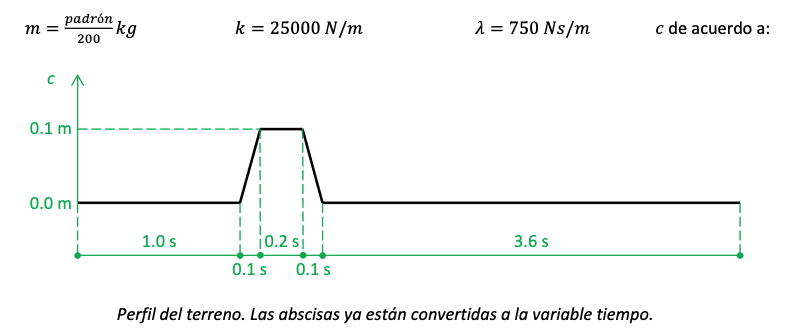

Funcion que modela el c


In [ ]:
def valor_de_c(tiempo):
    """
    Devuelve el valor de c y c' en funcion del tiempo, en forma de una tupla (c , c').
    """

    if (tiempo <= 1.1 and tiempo >1.0 ) :
        return (tiempo-1,1)

    elif (tiempo<1.4 and tiempo>=1.3):
        return (tiempo-1.3,-1)

    elif (tiempo<1.3 and tiempo>1.1):
        return(0.1,0)

    else:
        return (0,0)

Actualizo mi funcion de runge kutta, cambiando el lambda y usando el calculo de c

In [ ]:
nuevo_lambda = 750
def calculo_q_c_dinamico(u,v,paso,punto_tiempo):
    """
    Calculamos las q's
    """
    c, c_prima = valor_de_c(punto_tiempo)
    q1u = paso*v
    q1v = paso*((1/m)*(k*(c-u)+nuevo_lambda*(c_prima-v)))

    q2u = paso*(v+q1v)
    q2v = paso*((1/m)*(k*(c-(u+q1u))+nuevo_lambda*(c_prima-(v+q1v))))

    return q1u,q2u,q1v,q2v

def runge_kutta_c_dinamico(funcion, u0, v0, paso_h, intervalo_t):
    # Creamos vector tiempo desde 0 hasta intervalo_t, con un paso_h.
    # Aca guardamos los puntos en el tiempo donde vamos a evaluar la solución.
    tiempo = np.arange(0, intervalo_t, paso_h)


    valores_u = []
    valores_v = []

    # seteamos condiciones iniciales
    u = u0
    v = v0

    # Recorremos los puntos en el tiempo.
    for t in tiempo:
        # Guardo el valor obtenido para el paso actual en los vectores.
        valores_u.append(u)
        valores_v.append(v)

        q1u,q2u,q1v,q2v = calculo_q_c_dinamico(u,v,paso_h, t)

        u += 0.5*(q1u+q2u)
        v += 0.5*(q1v+q2v)

    return tiempo, valores_u, valores_v


In [ ]:
mejor_paso_rk = 0.001

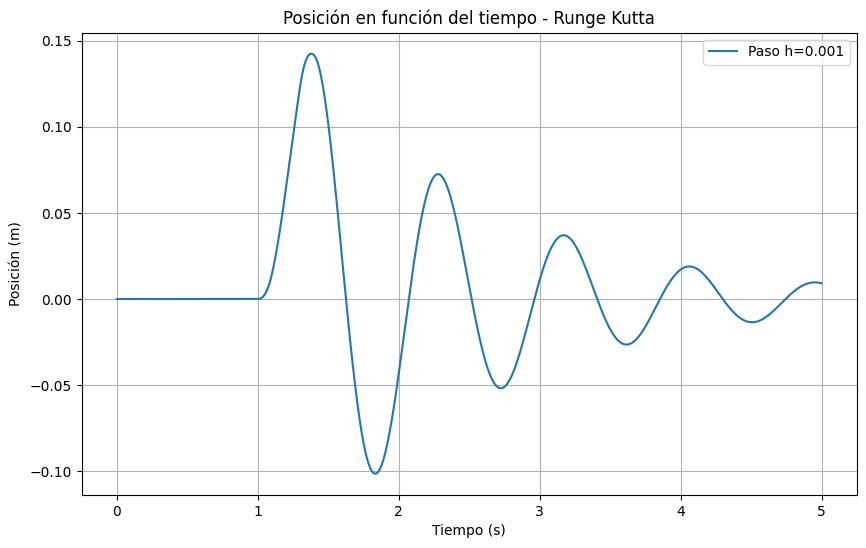

In [ ]:
# Gráfico comparativo
plt.figure(figsize=(10, 6))

tiempo, valores_y, _ = runge_kutta_c_dinamico(calculo_q_c_dinamico, y0, v0, mejor_paso_rk, INTERVALO_T)
plt.plot(tiempo, valores_y, label=f"Paso h={mejor_paso_rk}")

plt.title("Posición en función del tiempo - Runge Kutta")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.legend()
plt.grid(True)
plt.show()

### 2.2. Modificar los valores de 𝑘 y 𝜆 para optimizar la amortiguación del vehículo, teniendo en cuenta las siguientes restricciones:

a) El sistema de amortiguación no puede comprimirse más de 0.05 m, es decir 𝑦 − 𝑐 ≥ −0.05 𝑚.

b) La aceleración vertical 𝑦′′ al pasar por el lomo de burro debe minimizarse

c) Las oscilaciones en la carrocería después del lomo de burro deben minimizarse

In [ ]:
paso_prueba = 0.001


In [ ]:
def calculo_q(u,v,paso,k,lambda_, c, c_prima):
    """
    Calculamos las q's
    """
    q1u = paso*v
    q1v = paso*((1/m)*(k*(c-u)+lambda_*(c_prima-v)))

    q2u = paso*(v+q1v)
    q2v = paso*((1/m)*(k*(c-(u+q1u))+lambda_*(c_prima-(v+q1v))))

    return q1u,q2u,q1v,q2v


def optimosFB(paso_h, intervalo_t, u0, v0):
    """
    Calculamos el lambda y K optimos a partir de Fuerza Bruta.
    """

    valores_k = []
    for i in range(1000,91000,1000): valores_k.append(i)

    valores_lambda = []
    for i in range(150,5250,150): valores_lambda.append(i)

    min_compresion = []     #Lista con tuplas de la forma (k,lambda,compresion)
    max_aceleracion = []    #Lista con tuplas de la forma (k,lambda,aceleracion)

    tiempo = np.arange(0, intervalo_t, paso_h)

    for k in valores_k:

        for lam in valores_lambda:

            min_comp = float("inf")
            max_ac =   float("-inf")

            u = u0
            v = v0

            for t in tiempo:
                c , c_prima = valor_de_c(t)
                q1u,q2u,q1v,q2v = calculo_q(u,v,paso_h,k,lam,c,c_prima)

                u += 0.5*(q1u+q2u)
                v += 0.5*(q1v+q2v)

                #Buscamos el momento en el que el resorte este mas comprimido.
                if (u-c)<min_comp:
                    min_comp = (u-c)

                #Buscamos la aceleracion maxima al pasar por la loma de burro.
                if (t>=1.1) and (t<=1.4):
                    aceleracion = q1v/paso_h
                    if aceleracion>max_ac:
                        max_ac = aceleracion

            if (min_comp)>=-0.05:
                min_compresion.append((k,lam,min_comp))

            max_aceleracion.append((k,lam,max_ac))


    opt_k_comp, opt_lam_comp, _ = max(min_compresion, key=lambda item:item[2])
    opt_k_ac, opt_lam_ac, _ = min(max_aceleracion, key=lambda item:item[2])

    return opt_k_comp, opt_k_ac, opt_lam_comp, opt_lam_ac

In [ ]:
k_opt_comp, k_opt_acel, lambda_opt_comp, lambda_opt_acel = optimosFB(paso_prueba,INTERVALO_T, y0, v0)

In [ ]:
print(k_opt_comp)
print(k_opt_acel)
print(lambda_opt_comp)
print(lambda_opt_acel)

67000
1000
5100
150


In [ ]:
def calculo_q_c_dinamico2(u,v,paso,nuevo_k,nuevo_lambda,punto_tiempo):
    """
    Calculamos las q's
    """
    c, c_prima = valor_de_c(punto_tiempo)
    q1u = paso*v
    q1v = paso*((1/m)*(nuevo_k*(c-u)+nuevo_lambda*(c_prima-v)))

    q2u = paso*(v+q1v)
    q2v = paso*((1/m)*(nuevo_k*(c-(u+q1u))+nuevo_lambda*(c_prima-(v+q1v))))

    return q1u,q2u,q1v,q2v

In [ ]:
def runge_kutta_dinamico(funcion, u0, v0, nuevo_k, nuevo_lambd, paso_h, intervalo_t):
    # Creamos vector tiempo desde 0 hasta intervalo_t, con un paso_h.
    # Aca guardamos los puntos en el tiempo donde vamos a evaluar la solución.
    tiempo = np.arange(0, intervalo_t, paso_h)


    valores_u = []
    valores_v = []

    # seteamos condiciones iniciales
    u = u0
    v = v0

    # Recorremos los puntos en el tiempo.
    for t in tiempo:
        # Guardo el valor obtenido para el paso actual en los vectores.
        valores_u.append(u)
        valores_v.append(v)

        q1u,q2u,q1v,q2v = calculo_q_c_dinamico2(u,v,paso_h, nuevo_k, nuevo_lambda, t)

        u += 0.5*(q1u+q2u)
        v += 0.5*(q1v+q2v)

    return tiempo, valores_u, valores_v

In [ ]:
nuevo_k = 67000

In [ ]:
nuevo_lambda = 5100

In [ ]:
tiempo, valores_y, _ = runge_kutta_dinamico(calculo_q, y0, v0, nuevo_k, nuevo_lambda, paso_h, INTERVALO_T)


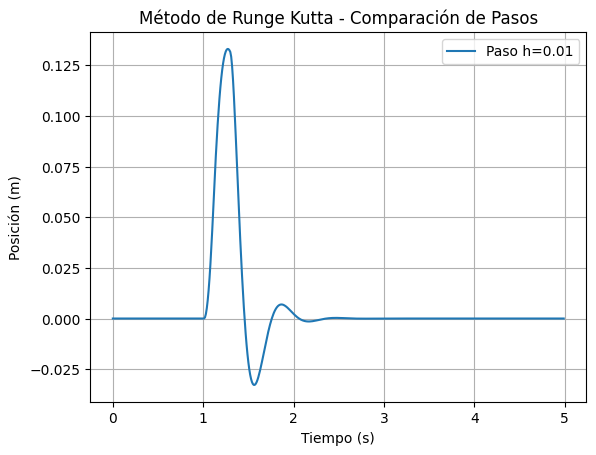

In [ ]:
plt.plot(tiempo, valores_y, label=f"Paso h={paso_h}")
plt.title("Método de Runge Kutta - Comparación de Pasos")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
nuevo_k = 1000
nuevo_lambda = 150

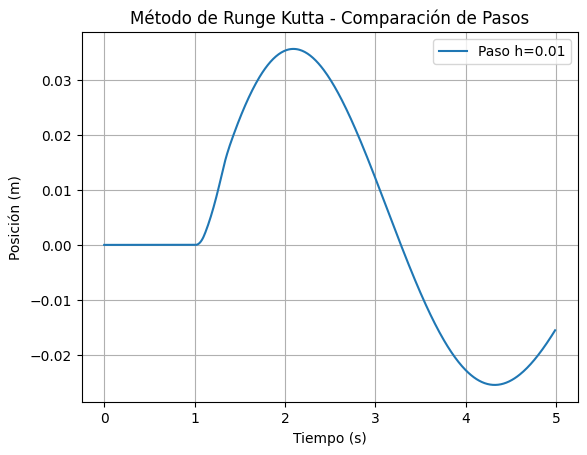

In [ ]:
tiempo_ac, valores_y_ac, velocidad_ac = runge_kutta_dinamico(calculo_q, y0, v0, nuevo_k, nuevo_lambda, paso_h, INTERVALO_T)
plt.plot(tiempo_ac, valores_y_ac, label=f"Paso h={paso_h}")
plt.title("Método de Runge Kutta - Comparación de Pasos")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.legend()
plt.grid(True)
plt.show()

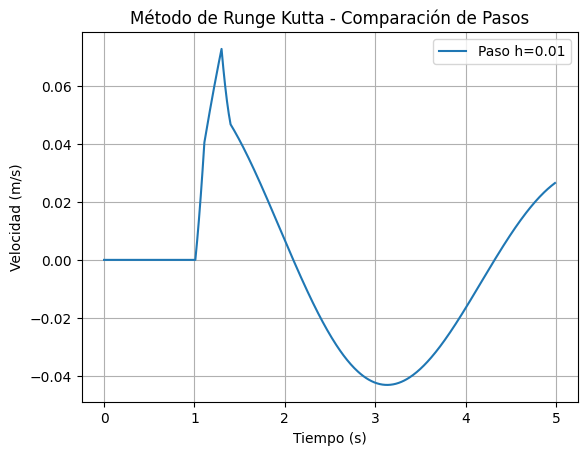

In [ ]:
plt.plot(tiempo_ac, velocidad_ac, label=f"Paso h={paso_h}")
plt.title("Método de Runge Kutta - Comparación de Pasos")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def runge_kutta_lomo_de_burro(funcion, u0, v0, nuevo_k, nuevo_lambd, paso_h, intervalo_t):
    # Creamos vector tiempo desde 0 hasta intervalo_t, con un paso_h.
    # Aca guardamos los puntos en el tiempo donde vamos a evaluar la solución.
    tiempo = np.arange(1.0, 1.5, paso_h)


    valores_u = []
    valores_v = []

    # seteamos condiciones iniciales
    u = u0
    v = v0

    # Recorremos los puntos en el tiempo.
    for t in tiempo:
        # Guardo el valor obtenido para el paso actual en los vectores.
        valores_u.append(u)
        valores_v.append(v)

        q1u,q2u,q1v,q2v = calculo_q_c_dinamico2(u,v,paso_h, nuevo_k, nuevo_lambda, t)

        u += 0.5*(q1u+q2u)
        v += 0.5*(q1v+q2v)

    return tiempo, valores_u, valores_v

In [ ]:
tiempo_ac, valores_y_ac, velocidad_ac = runge_kutta_lomo_de_burro(calculo_q, y0, v0, nuevo_k, nuevo_lambda, paso_h, INTERVALO_T)


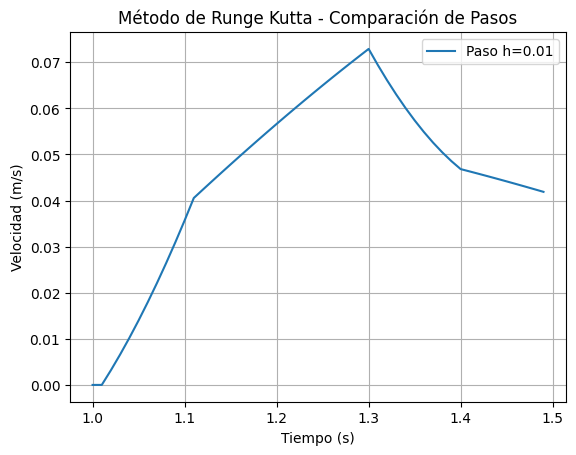

In [ ]:
plt.plot(tiempo_ac, velocidad_ac, label=f"Paso h={paso_h}")
plt.title("Método de Runge Kutta - Comparación de Pasos")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def aceleracion_en_funcion_del_tiempo(u,v, paso_h, nuevo_k, nuevo_lambda):
  tiempo = np.arange(0, 5, paso_h)

  aceleracion = []
  for t in tiempo:
        c, c_prima = valor_de_c(t)
        ac =((1/m)*(k*(c-u)+lambda_*(c_prima-v)))
        aceleracion.append(ac)

        q1u,q2u,q1v,q2v = calculo_q_c_dinamico2(u,v,paso_h, nuevo_k, nuevo_lambda, t)
        u += 0.5*(q1u+q2u)
        v += 0.5*(q1v+q2v)


  return tiempo, aceleracion

In [ ]:
paso_h = 0.001

In [ ]:
tiempo_ac, acelaracion = aceleracion_en_funcion_del_tiempo(y0, v0, paso_h, nuevo_k, nuevo_lambda)


In [ ]:
#valores enunciado
nuevo_k = 25000
nuevo_lambda = 750
tiempo_ac, acelaracion = aceleracion_en_funcion_del_tiempo(y0, v0, paso_h, nuevo_k, nuevo_lambda)


In [ ]:
#valores optimos compresion
nuevo_k = 67000
nuevo_lambda = 5100
tiempo_ac, acelaracion = aceleracion_en_funcion_del_tiempo(y0, v0, paso_h, nuevo_k, nuevo_lambda)


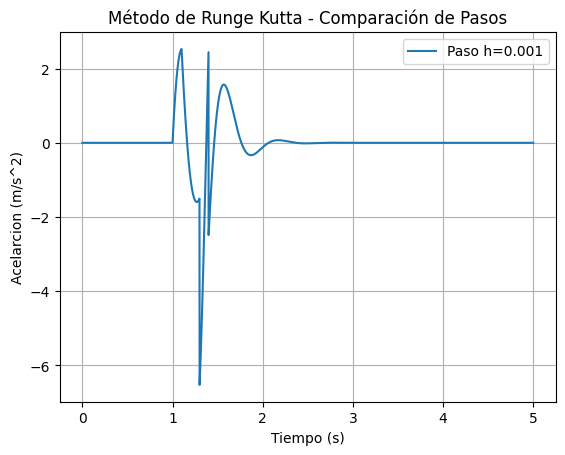

In [ ]:
plt.plot(tiempo_ac, acelaracion, label=f"Paso h={paso_h}")
plt.title("Método de Runge Kutta - Comparación de Pasos")
plt.xlabel("Tiempo (s)")
plt.ylabel("Acelarcion (m/s^2)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from math import sqrt as raiz

In [ ]:
"""
Vamos a buscar un K y un lambda, tal que el sistema de amortiguacion no se comprima
mas de 0.05m, es decir y-c >= 0.05m.
Para buscar el optimo lo haremos por Fuerza Bruta, primero con un lambda constante
y con distintos valores de k hasta encontrar el optimo k, para luego ir variando
lambda y con el k optimo, hasta en contrar el optimo de lambda. Luego haremos
al reves, primero buscaremos el optimo lambda y luego el optimo k.
"""

def calculo_q(u,v,paso,k,lambda_, c, c_prima):
    """
    Calculamos las q's
    """
    q1u = paso*v
    q1v = paso*((1/m)*(k*(c-u)+lambda_*(c_prima-v)))

    q2u = paso*(v+q1v)
    q2v = paso*((1/m)*(k*(c-(u+q1u))+lambda_*(c_prima-(v+q1v))))

    return q1u,q2u,q1v,q2v


In [ ]:
#------------------------------------------HECHO POR FB---------------------------------------------------

def modulo(x1):
    """
    Operacion modulo de un numero
    """
    return raiz((x1**2))



def optimosFB(paso_h, intervalo_t, u0, v0):
    """
    Calculamos el lambda y K optimos a partir de Fuerza Bruta.
    """

    valores_k = []
    for i in range(1000,91000,1000): valores_k.append(i)

    valores_lambda = []
    for i in range(150,5250,150): valores_lambda.append(i)

    min_compresion = []     #Lista con tuplas de la forma (k,lambda,compresion)
    max_aceleracion = []    #Lista con tuplas de la forma (k,lambda,aceleracion)
    osilaciones = []        #Lista con tuplas de la forma (k,lambda,suma_osilaciones)

    tiempo = np.arange(0, intervalo_t, paso_h)

    for k in valores_k:

        for lam in valores_lambda:

            min_comp = float("inf")
            max_ac =   float("-inf")
            suma_osilaciones = 0

            u = u0
            v = v0

            for t in tiempo:
                c , c_prima = valor_de_c(t)
                q1u,q2u,q1v,q2v = calculo_q(u,v,paso_h,k,lam,c,c_prima)

                u += 0.5*(q1u+q2u)
                v += 0.5*(q1v+q2v)

                #Buscamos el momento en el que el resorte este mas comprimido.
                if (u-c)<min_comp:
                    min_comp = (u-c)

                #Buscamos la aceleracion maxima al pasar por la loma de burro.
                if (t>=1.1) and (t<=1.4):
                    aceleracion = q1v/paso_h
                    if aceleracion>max_ac:
                        max_ac = aceleracion

                #Sumamos en modulo todas las osilaciones que se dan luego de la loma de burro.
                if t>=1.4:
                    suma_osilaciones+=modulo(u)


            if (min_comp)>=-0.05:
                min_compresion.append((k,lam,min_comp))

            max_aceleracion.append((k,lam,max_ac))

            osilaciones.append((k,lam, suma_osilaciones))


    opt_k_comp, opt_lam_comp, _ = max(min_compresion, key=lambda item:item[2])
    opt_k_ac, opt_lam_ac, _ = min(max_aceleracion, key=lambda item:item[2])
    opt_k_os, opt_lam_os, _ = min(osilaciones, key=lambda item:item[2])

    return opt_k_comp, opt_k_ac, opt_k_os, opt_lam_comp, opt_lam_ac, opt_lam_os

In [ ]:
paso_prueba = 0.001

#### Obtengo los mejores valores por fuerza bruta

In [ ]:
opt_k_comp, opt_k_ac, opt_k_os, opt_lam_comp, opt_lam_ac, opt_lam_os = optimosFB(paso_prueba,INTERVALO_T, y0, v0)

In [ ]:
print(opt_k_comp)
print(opt_k_ac)
print(opt_k_os)
print(opt_lam_comp)
print(opt_lam_ac)
print(opt_lam_os)

67000
1000
1000
5100
150
5100


In [ ]:
def calculo_q_c_dinamico2(u,v,paso,nuevo_k,nuevo_lambda,punto_tiempo):
    """
    Calculamos las q's
    """
    c, c_prima = valor_de_c(punto_tiempo)
    q1u = paso*v
    q1v = paso*((1/m)*(nuevo_k*(c-u)+nuevo_lambda*(c_prima-v)))

    q2u = paso*(v+q1v)
    q2v = paso*((1/m)*(nuevo_k*(c-(u+q1u))+nuevo_lambda*(c_prima-(v+q1v))))

    return q1u,q2u,q1v,q2v

In [ ]:
def runge_kutta_dinamico(funcion, u0, v0, nuevo_k, nuevo_lambd, paso_h, intervalo_t):
    # Creamos vector tiempo desde 0 hasta intervalo_t, con un paso_h.
    # Aca guardamos los puntos en el tiempo donde vamos a evaluar la solución.
    tiempo = np.arange(0, intervalo_t, paso_h)


    valores_u = []
    valores_v = []

    # seteamos condiciones iniciales
    u = u0
    v = v0

    # Recorremos los puntos en el tiempo.
    for t in tiempo:
        # Guardo el valor obtenido para el paso actual en los vectores.
        valores_u.append(u)
        valores_v.append(v)

        q1u,q2u,q1v,q2v = calculo_q_c_dinamico2(u,v,paso_h, nuevo_k, nuevo_lambda, t)

        u += 0.5*(q1u+q2u)
        v += 0.5*(q1v+q2v)

    return tiempo, valores_u, valores_v

#### Optimo para compresion

In [ ]:
nuevo_k = 67000

In [ ]:
nuevo_lambda = 5100

In [ ]:
tiempo, valores_y, _ = runge_kutta_dinamico(calculo_q, y0, v0, nuevo_k, nuevo_lambda, mejor_paso_rk, INTERVALO_T)


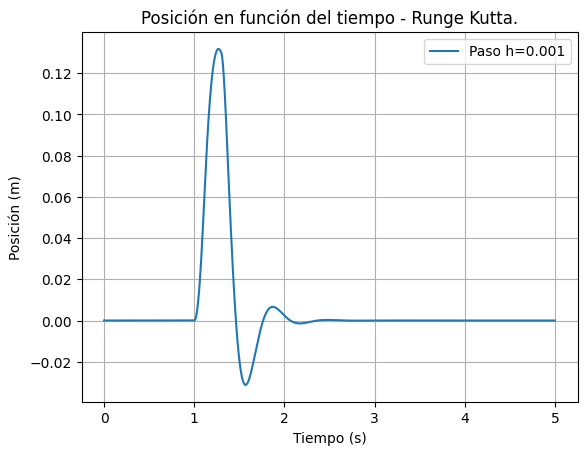

In [ ]:
plt.plot(tiempo, valores_y, label=f"Paso h={paso_prueba}")
plt.title("Posición en función del tiempo - Runge Kutta.")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.legend()
plt.grid(True)
plt.show()

#### Optimo para aceleracion

In [ ]:
nuevo_k = 1000

In [ ]:
nuevo_lambda = 150

In [ ]:
mejor_paso_rk = 0.001

In [ ]:
def aceleracion_en_funcion_del_tiempo(u,v, paso_h, nuevo_k, nuevo_lambda):
  tiempo = np.arange(0, INTERVALO_T, paso_h)

  aceleracion = []
  for t in tiempo:
        c, c_prima = valor_de_c(t)
        ac =((1/m)*(k*(c-u)+lambda_*(c_prima-v)))
        aceleracion.append(ac)

        q1u,q2u,q1v,q2v = calculo_q_c_dinamico2(u,v,paso_h, nuevo_k, nuevo_lambda, t)
        u += 0.5*(q1u+q2u)
        v += 0.5*(q1v+q2v)


  return tiempo, aceleracion

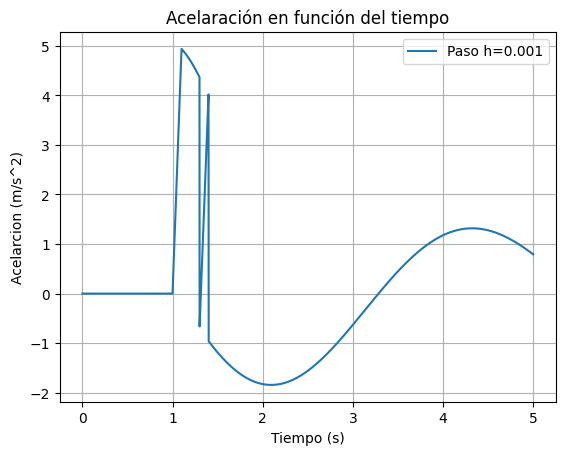

In [ ]:
plt.plot(tiempo_ac, acelaracion, label=f"Paso h={mejor_paso_rk}")
plt.title("Acelaración en función del tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Acelarcion (m/s^2)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
tiempo_ac, acelaracion = aceleracion_en_funcion_del_tiempo(y0, v0, mejor_paso_rk, nuevo_k, nuevo_lambda)


In [ ]:
tiempo, valores_y, _ = runge_kutta_dinamico(calculo_q, y0, v0, nuevo_k, nuevo_lambda, mejor_paso_rk, INTERVALO_T)


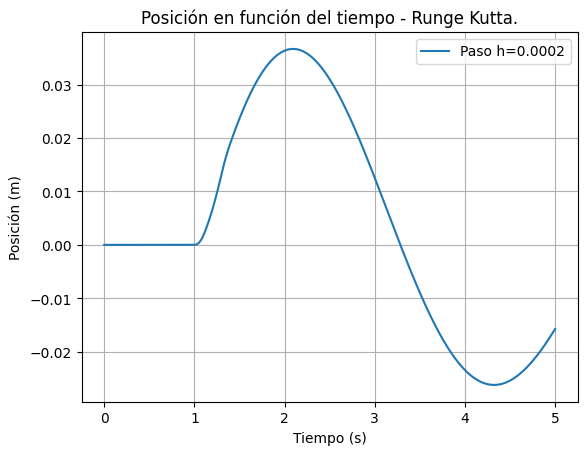

In [ ]:
plt.plot(tiempo, valores_y, label=f"Paso h={paso_h}")
plt.title("Posición en función del tiempo - Runge Kutta.")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.legend()
plt.grid(True)
plt.show()

#### Optimo para las oscilaciones

In [ ]:
nuevo_k = 5100

In [ ]:
nuevo_lambda = 5100

In [ ]:
mejor_paso_rk = 0.001

In [ ]:
tiempo, valores_y, _ = runge_kutta_dinamico(calculo_q, y0, v0, nuevo_k, nuevo_lambda, mejor_paso_rk, INTERVALO_T)


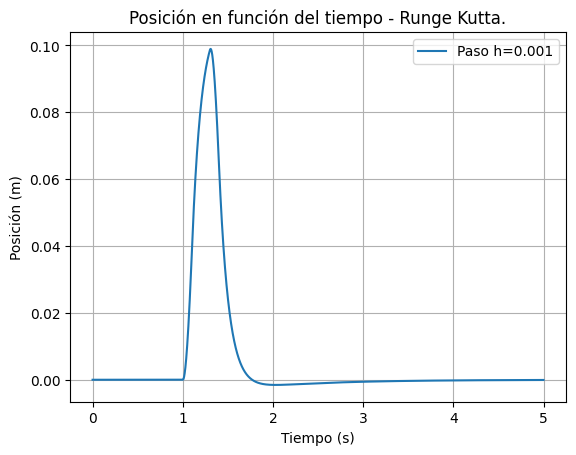

In [ ]:
plt.plot(tiempo, valores_y, label=f"Paso h={mejor_paso_rk}")
plt.title("Posición en función del tiempo - Runge Kutta.")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.legend()
plt.grid(True)
plt.show()